In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\spide\Bootcamp\mi_entorno\Modulo 1\Proyecto_Modulo_1\datos_limpios.csv')

# ANÁLISIS EXPLORATORIO DE DATOS

#### Debido a que mi df tiene las variables numéricas sesgadas y no se ven bien en un histograma las paso a escala logaritmica pero en una variable llamada df2

In [4]:
# Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Aplicar la transformación logarítmica a las columnas numéricas
df_log = df.copy()
df_log[numeric_cols] = df_log[numeric_cols].apply(lambda x: np.log1p(x))

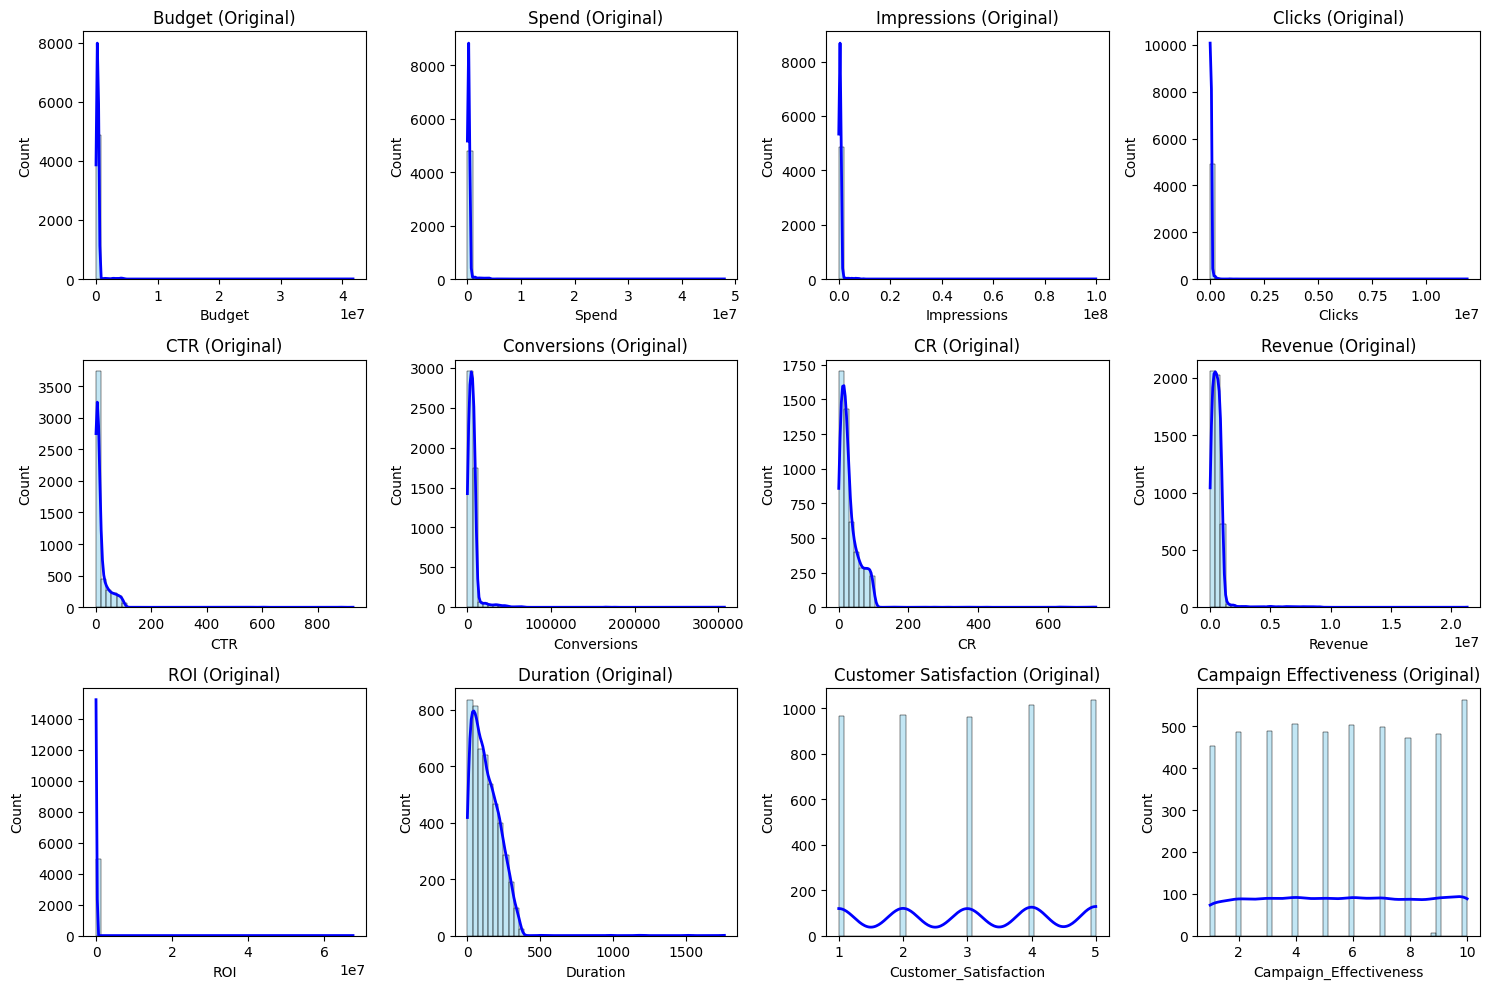

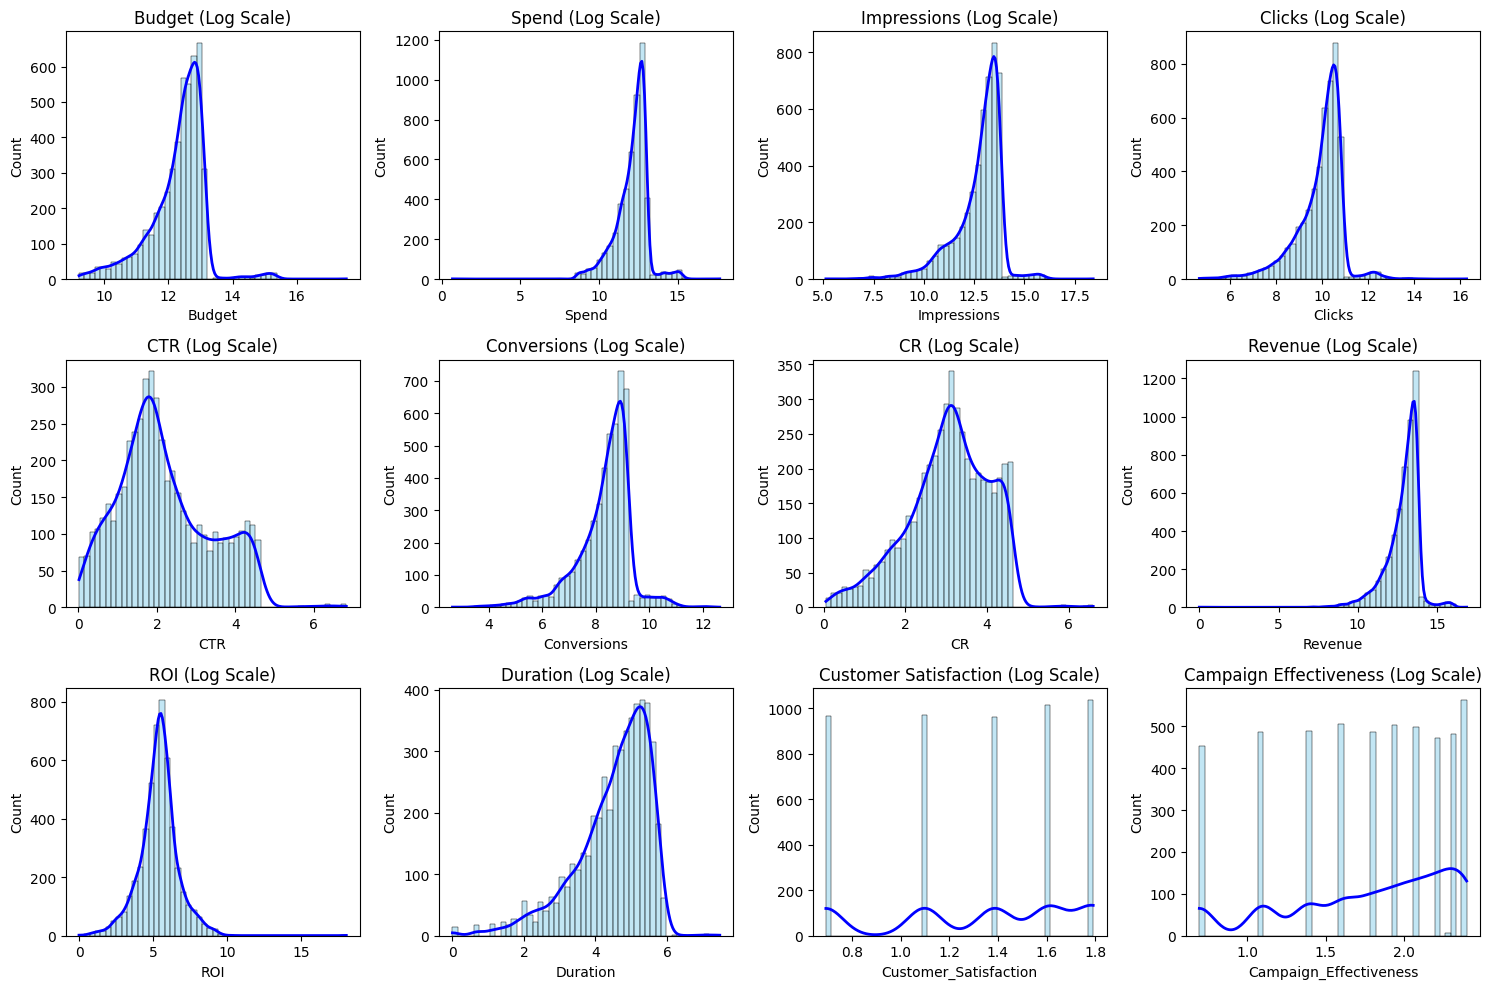

In [11]:
def plot_histograms(dataframe, title_suffix=''):
    # Lista de columnas a verificar y asignar
    columns = [
        'Budget', 'Spend', 'Impressions', 'Clicks',
        'CTR', 'Conversions', 'CR', 'Revenue',
        'ROI', 'Duration', 'Customer_Satisfaction', 'Campaign_Effectiveness'
    ]

    # Verifica que todas las columnas existen en el DataFrame
    for column in columns:
        if column not in dataframe.columns:
            print(f"Error: la columna '{column}' no se encuentra en el DataFrame.")

    # Crear subplots de 3 filas y 4 columnas
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))

    # Lista de variables y títulos para los histogramas
    variables = [
        (dataframe['Budget'], 'Budget'), (dataframe['Spend'], 'Spend'), (dataframe['Impressions'], 'Impressions'), (dataframe['Clicks'], 'Clicks'),
        (dataframe['CTR'], 'CTR'), (dataframe['Conversions'], 'Conversions'), (dataframe['CR'], 'CR'), (dataframe['Revenue'], 'Revenue'),
        (dataframe['ROI'], 'ROI'), (dataframe['Duration'], 'Duration'), (dataframe['Customer_Satisfaction'], 'Customer Satisfaction'), (dataframe['Campaign_Effectiveness'], 'Campaign Effectiveness')
    ]

    # Generar histogramas para cada variable
    for ax, (var, title) in zip(axs.flat, variables):
        sns.histplot(var, bins=50, kde=True, ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f"{title} {title_suffix}")
        # Resaltar la línea de KDE
        kde_line = ax.lines[0]
        kde_line.set_color('blue')
        kde_line.set_linewidth(2)

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

# Llamar a la función para df
plot_histograms(df, title_suffix='(Original)')

# Llamar a la función para df_log
plot_histograms(df_log, title_suffix='(Log Scale)')


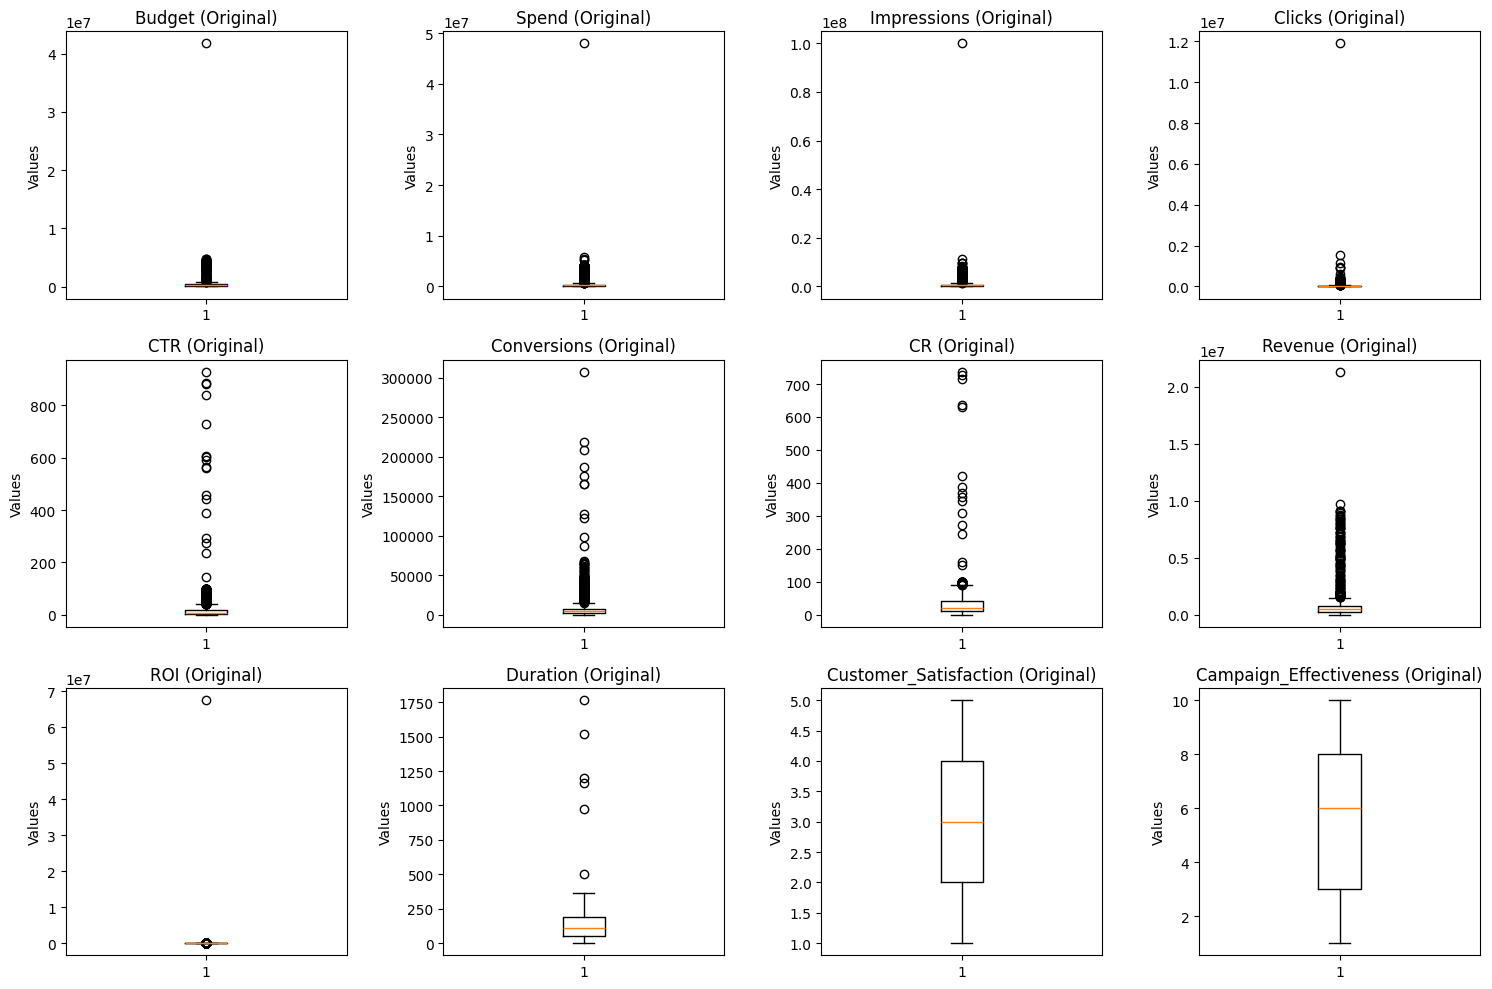

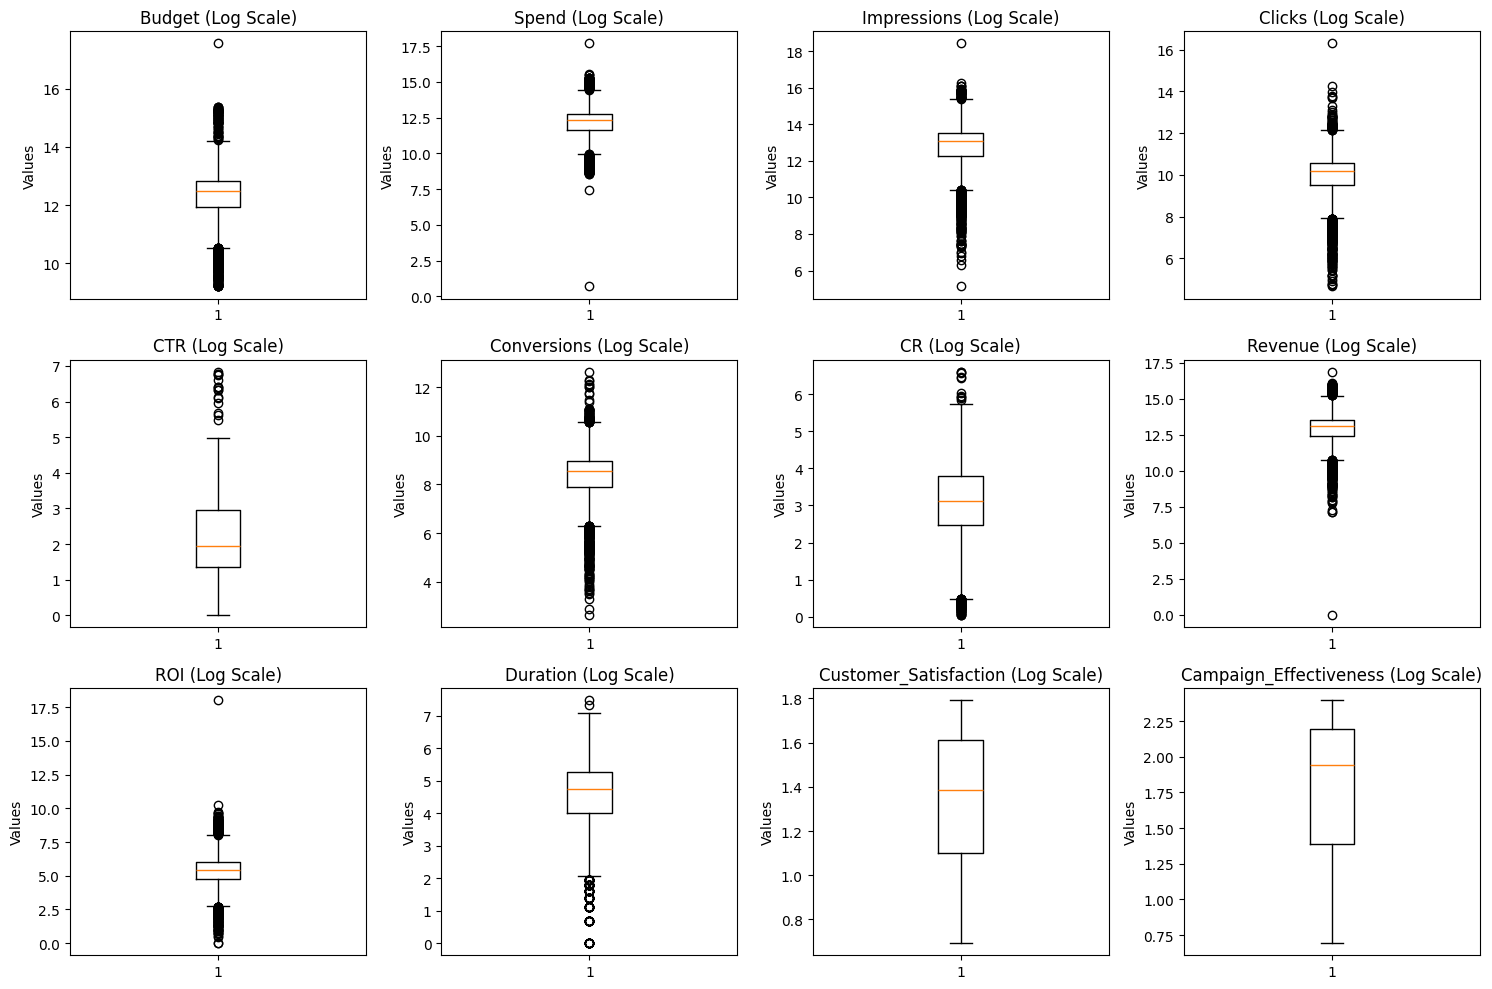

In [7]:
def plot_boxplots(dataframe, title_suffix=''):
    # Comprobamos que las columnas contengan datos numéricos
    columns_to_plot = [
        'Budget',
        'Spend',
        'Impressions',
        'Clicks',
        'CTR',
        'Conversions',
        'CR',
        'Revenue',
        'ROI',
        'Duration',
        'Customer_Satisfaction',
        'Campaign_Effectiveness'
    ]

    # Verificar que las columnas existen en el DataFrame y son numéricas
    for col in columns_to_plot:
        if col not in dataframe.columns:
            print(f"Columna {col} no encontrada en el DataFrame.")
        elif not pd.api.types.is_numeric_dtype(dataframe[col]):
            print(f"La columna {col} no es numérica.")

    # Crear subplots de 3 filas y 4 columnas
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # Crear una cuadrícula de 3x4

    # Aplanar el arreglo de ejes para facilitar el acceso
    ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = axes.flatten()

    # Crear un diccionario para mapear los ejes a las columnas
    axes_dict = {
        ax1: 'Budget',
        ax2: 'Spend',
        ax3: 'Impressions',
        ax4: 'Clicks',
        ax5: 'CTR',
        ax6: 'Conversions',
        ax7: 'CR',
        ax8: 'Revenue',
        ax9: 'ROI',
        ax10: 'Duration',
        ax11: 'Customer_Satisfaction',
        ax12: 'Campaign_Effectiveness'
    }

    # Graficar cada boxplot en su respectivo eje
    for ax, col in axes_dict.items():
        ax.boxplot(dataframe[col].dropna())  # Eliminar NaN para evitar errores
        ax.set_title(f"{col} {title_suffix}")
        ax.set_ylabel('Values')

    # Ajustar el layout
    plt.tight_layout()
    plt.show()

# Llamar a la función para df
plot_boxplots(df, title_suffix='(Original)')

# Llamar a la función para df_log
plot_boxplots(df_log, title_suffix='(Log Scale)')


Las variables numéricas del dataset muestran una gran variabilidad en sus distribuciones, lo que sugiere la presencia de datos sesgados y outliers que pueden afectar los análisis. En su forma original, la mayoría de las variables tienen distribuciones sesgadas a la izquierda con colas largas hacia la derecha. Sin embargo, al aplicar una transformación logarítmica, estas distribuciones se normalizan significativamente, lo que permite una visualización y análisis más precisos.

- Las variables como Budget, Spend, Impressions, Revenue, y ROI presentan distribuciones sesgadas a la izquierda, lo que sugiere que la mayoría de los valores están concentrados en el extremo inferior, con algunos valores extremos que estiran la distribución hacia la derecha.

- Las variables como Budget, Spend, Impressions, Revenue, y ROI presentan distribuciones sesgadas a la izquierda, lo que sugiere que la mayoría de los valores están concentrados en el extremo inferior, con algunos valores extremos que estiran la distribución hacia la derecha. Estos outliers, sobretodo en ROI, nos pueden dar información sobre como fueron las campañas más exitosas.

- Consideraremos la escala logarítmica para mejorar la interpretación de las correlaciones entre variables


## **ANÁLISIS DE LAS CORRELACIONES**

Correlaciones con ROI:
ROI                       1.00
Revenue                   0.63
CTR                       0.02
Conversions               0.02
Budget                    0.01
Impressions               0.01
CR                        0.01
Customer_Satisfaction     0.01
Campaign_Effectiveness    0.01
Clicks                    0.00
Duration                  0.00
Spend                    -0.64
Name: ROI, dtype: float64


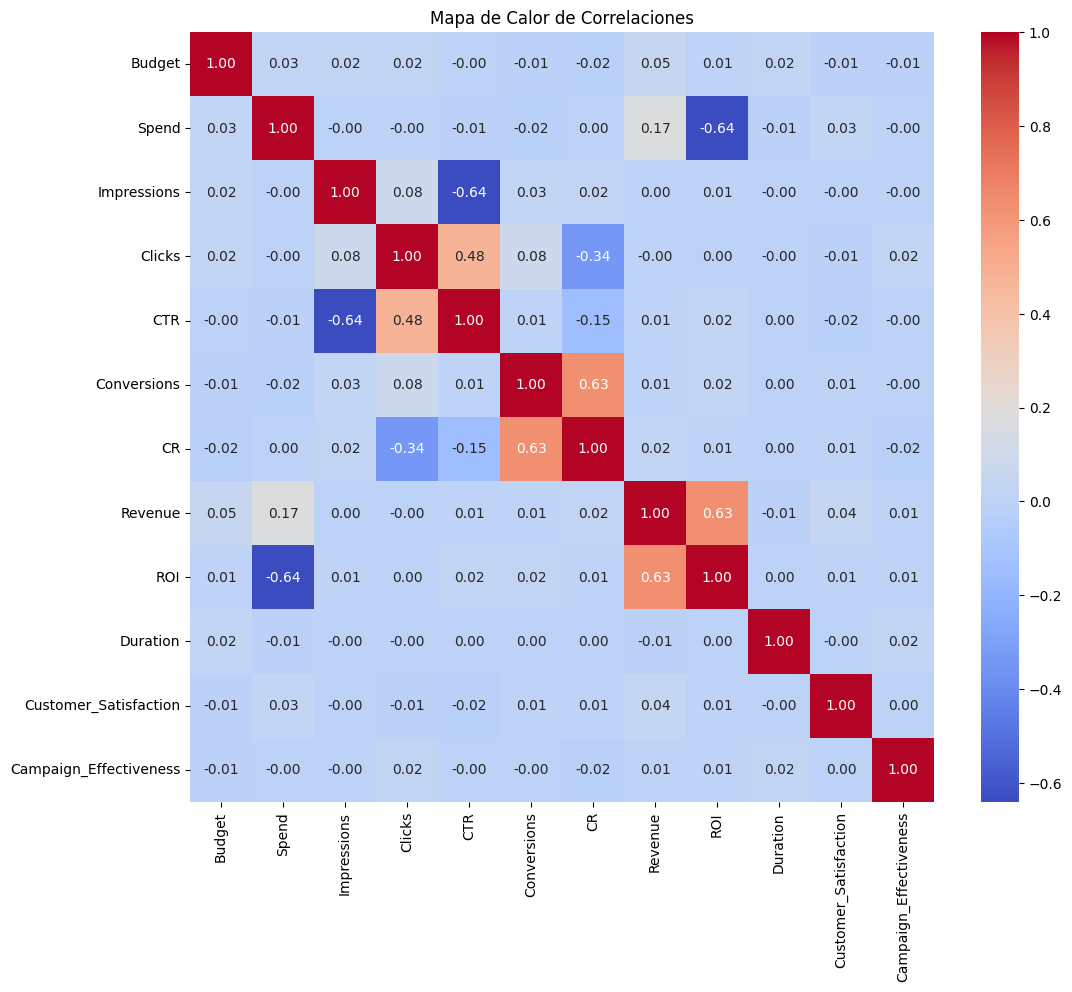

In [8]:
# Seleccionar solo las columnas numéricas para calcular las correlaciones.
numeric_df_log = df_log.select_dtypes(include=[np.number])

# Calcular correlaciones
correlations = numeric_df_log.corr().round(2)
print("Correlaciones con ROI:")
print(correlations['ROI'].sort_values(ascending=False))

# Visualizar las correlaciones en un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

##### **Diagnostico**

- **ROI y Revenue**: Existe una correlación positiva moderada (0.63) entre el ROI y los Revenue, lo que sugiere que las campañas que generan mayores ingresos tienden a tener un mejor retorno de inversión.

- **ROI y Spend**: La correlación negativa fuerte (-0.64) entre ROI y Spend indica que un mayor gasto en las campañas tiende a reducir el retorno de la inversión, lo que podría señalar ineficiencia en la asignación de presupuestos.

- **ROI y Otras Variables**: Las demás variables, como CTR, Conversions, Budget, e Impressions, tienen correlaciones muy bajas (cerca de 0) con el ROI, lo que sugiere una influencia limitada directa sobre el retorno de inversión.

- **Customer Satisfaction y Campaign Effectiveness**: Ambas variables tienen correlaciones casi nulas con el ROI, lo que implica que estas métricas no están relacionadas directamente con el retorno financiero ni con n inguna otra variable numérica.

#### **Conclusiones**

- **Optimización del Gasto (Spend)**: Dado que un mayor Spend se asocia con un ROI más bajo, es crucial revisar cómo se está asignando el presupuesto de las campañas. Se debe buscar un balance en el gasto para maximizar los ingresos sin reducir el retorno de inversión.

- **Aumentar la Eficiencia de Revenue**: Dado que Revenue tiene una correlación positiva con el ROI, las estrategias deben centrarse en aumentar los ingresos generados por cada campaña, optimizando las tácticas de conversión.

- **Evaluar Estrategias de CTR y Conversiones**: Aunque el CTR y Conversions tienen correlaciones bajas con el ROI, podrían influir indirectamente en el Revenue. Se debe profundizar en estrategias que mejoren estas métricas sin incurrir en un gasto excesivo.

- **Monitorear la Relación Gasto-Ingreso**: El análisis sugiere una revisión del retorno marginal de los gastos adicionales. Podría ser útil implementar modelos predictivos para determinar en qué punto un mayor Spend deja de ser rentable.

# **PREGUNTAS A RESPONDER** 
##### *¿En que región deberíamos optimizar las inversiones de las campañas de marketing?*
##### *¿Qué categoría de producto es más interesante para el público?*
##### *¿Durante que meses serán ás efectivas las inversiones?*


## **CAMPAÑAS MÁS EXITOSAS POR REGIÓN**

Tomo el percentil 75 del ROI como criterio para identificar las campañas exitosas porque permite destacar el 25% superior de las campañas con mejor rendimiento, lo que facilita el análisis de los factores que contribuyen al éxito. Utilizo la escala lineal para asegurar que la evaluación de los outliers y de las campañas más exitosas refleje sus valores originales sin la distorsión que podría introducir una transformación logarítmica.


Tabla descriptiva de la Región: Kuala Lumpur (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,2.600000e+02,260.000000,2.600000e+02,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000,260.000000,260.000000,260.000000
mean,3.124109e+05,95753.847889,5.263712e+05,28555.779565,20.911765,6263.138676,28.048330,8.894016e+05,1546.099340,129.980483,3.030769,5.515385
std,3.753260e+05,76122.242441,5.184391e+05,20600.743741,52.368610,8868.202467,33.598845,1.063259e+06,1947.646081,105.212800,1.451605,2.938848
min,1.509300e+04,6076.000000,2.070000e+03,134.000000,0.016727,48.000000,0.118035,3.695000e+04,442.908796,0.000000,1.000000,1.000000
25%,1.711472e+05,36273.750000,1.991888e+05,15292.500000,3.425704,2519.250000,9.927253,5.176608e+05,539.758139,47.500000,2.000000,3.000000
50%,2.799020e+05,84496.000000,4.941775e+05,27705.000000,7.087742,5383.000000,19.263041,7.356840e+05,765.493451,107.000000,3.000000,5.500000
75%,3.923828e+05,137350.500000,7.539368e+05,39513.750000,22.971980,7861.000000,35.281820,9.024428e+05,1558.939068,195.000000,4.000000,8.000000
max,3.757861e+06,445052.000000,6.042568e+06,207612.490100,563.632594,122027.527888,420.625031,8.380897e+06,15436.372614,976.925613,5.000000,10.000000



Tabla descriptiva de la Región: Penang (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,2.400000e+02,2.400000e+02,2.400000e+02,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000
mean,3.522762e+05,1.117716e+05,5.202909e+05,28712.706433,14.615114,6482.462372,34.229892,9.325409e+05,1513.624822,129.200000,3.162500,5.674548
std,5.713670e+05,1.504289e+05,4.167088e+05,29455.559572,21.487548,8056.335586,52.042284,1.589339e+06,2166.900858,91.301753,1.376221,2.828383
min,1.048700e+04,5.280000e+03,3.669000e+03,104.000000,0.022448,124.000000,0.652717,5.114200e+04,405.000000,1.000000,1.000000,1.000000
25%,1.561608e+05,4.425625e+04,2.498590e+05,12755.750000,2.651368,2798.250000,11.050557,4.999608e+05,500.014267,55.000000,2.000000,3.000000
50%,2.756000e+05,8.321376e+04,4.800032e+05,26510.000000,5.672666,5223.750000,22.867925,7.336960e+05,728.670874,108.000000,3.000000,6.000000
75%,3.816015e+05,1.323640e+05,7.426220e+05,37156.500000,13.978158,8073.250000,44.832003,8.851942e+05,1331.726091,202.000000,4.000000,8.000000
max,4.482222e+06,1.981140e+06,4.062700e+06,261929.875100,97.130000,87467.678463,728.801338,2.130306e+07,14776.487432,360.000000,5.000000,10.000000



Tabla descriptiva de la Región: Sarawak (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000,253.000000,2.530000e+02,2.530000e+02,253.000000,253.000000,253.000000
mean,2.768896e+05,100728.739308,5.893463e+05,31101.486951,20.791223,7583.655445,31.368195,1.006234e+06,2.685792e+05,132.920949,2.996047,5.426877
std,2.949902e+05,84552.485240,8.015763e+05,33970.675789,37.853208,15066.964249,26.527036,1.312085e+06,4.248664e+06,88.317124,1.404353,2.755872
min,1.001500e+04,1.000000,1.516360e+03,491.000000,0.054420,43.000000,0.115013,2.908000e+04,4.310000e+02,1.000000,1.000000,1.000000
25%,1.517330e+05,37518.000000,2.381860e+05,13210.000000,2.723448,2894.000000,10.510567,5.627620e+05,5.322332e+02,61.000000,2.000000,3.000000
50%,2.605070e+05,83134.000000,5.172940e+05,26538.000000,6.159611,5514.000000,23.535139,7.466270e+05,8.424079e+02,114.000000,3.000000,5.000000
75%,3.564520e+05,132561.000000,7.761220e+05,39142.000000,24.940762,8098.000000,49.909609,8.936750e+05,1.546103e+03,196.000000,4.000000,8.000000
max,3.283213e+06,444864.000000,7.957766e+06,234394.638600,457.089952,164990.386111,99.310000,8.755533e+06,6.758060e+07,363.000000,5.000000,10.000000



Tabla descriptiva de la Región: Sabah (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,2.410000e+02,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000
mean,2.866509e+05,85606.120761,5.720086e+05,34926.831593,16.283722,6727.039141,29.615144,8.336830e+05,1663.668080,129.629063,3.004149,5.547268
std,3.398521e+05,67797.730859,8.482354e+05,46852.913897,22.013785,7100.340738,25.532061,9.926178e+05,2590.527125,107.489942,1.456302,2.951669
min,1.306100e+04,5434.000000,5.057000e+03,109.000000,0.020016,17.000000,0.051994,6.748224e+04,436.000000,0.000000,1.000000,1.000000
25%,1.414220e+05,34084.000000,2.229090e+05,14785.000000,3.052304,2897.000000,11.695427,4.606190e+05,552.984406,56.000000,2.000000,3.000000
50%,2.653320e+05,70605.000000,4.459640e+05,27940.000000,6.281761,5563.000000,20.716997,6.963070e+05,854.448175,110.000000,3.000000,6.000000
75%,3.776210e+05,118009.000000,7.054100e+05,38892.000000,19.741299,7737.000000,41.730000,8.851110e+05,1695.276266,187.000000,4.000000,8.000000
max,4.316968e+06,427255.000000,8.117866e+06,347001.320400,98.040000,49214.490910,99.820000,8.633691e+06,28287.323891,1166.007990,5.000000,10.000000



Tabla descriptiva de la Región: Johor (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,2.410000e+02,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000,2.410000e+02,241.000000,241.000000,241.000000,241.000000
mean,3.389100e+05,107385.471164,5.526060e+05,31680.835042,19.199629,7331.424522,31.878946,9.680635e+05,1371.135590,130.522822,2.879668,5.473029
std,5.021095e+05,84931.879239,7.723142e+05,34372.332374,27.223094,13066.068891,32.836115,1.254065e+06,1708.350480,92.470313,1.451307,2.911239
min,2.071900e+04,5642.000000,1.680198e+02,149.000000,0.021929,107.000000,0.273036,2.915600e+04,413.000000,0.000000,1.000000,1.000000
25%,1.699170e+05,41045.000000,1.902240e+05,12868.000000,2.990000,3202.000000,12.473996,4.866590e+05,485.000000,53.000000,2.000000,3.000000
50%,2.653320e+05,90257.630979,4.593780e+05,28012.000000,6.039534,5110.000000,21.865772,7.640730e+05,711.654193,121.000000,3.000000,6.000000
75%,3.680040e+05,142514.000000,7.327550e+05,40629.000000,21.820000,7912.000000,39.667821,9.349390e+05,1318.513036,196.000000,4.000000,8.000000
max,4.311764e+06,428864.000000,7.741763e+06,250409.021300,99.930000,175645.741168,344.842756,9.067022e+06,11721.393189,356.000000,5.000000,10.000000



Tabla descriptiva de la Región: Malacca (Percentil 75)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,3.000000e+00,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.0
mean,2.095201e+06,119341.000000,3.417269e+07,27398.000000,5.369571,5173.000000,18.939514,3.799469e+06,3318.528978,120.666667,3.666667,5.0
std,1.592887e+06,25288.070765,5.694691e+07,7380.165107,8.567122,3910.592155,12.493124,6.224066e+05,1021.211719,46.068789,1.154701,4.0
min,2.653320e+05,91250.000000,1.811420e+05,19906.000000,0.034690,1247.000000,4.513700,3.136350e+06,2235.619075,71.000000,3.000000,1.0
25%,1.557151e+06,108866.500000,1.300731e+06,23766.500000,0.428572,3225.500000,15.328286,3.513695e+06,2845.716754,100.000000,3.000000,3.0
50%,2.848970e+06,126483.000000,2.420320e+06,27627.000000,0.822453,5204.000000,26.142871,3.891040e+06,3455.814434,129.000000,3.000000,5.0
75%,3.010135e+06,133386.500000,5.116846e+07,31144.000000,8.037012,7136.000000,26.152420,4.131029e+06,3859.983929,145.500000,4.000000,7.0
max,3.171300e+06,140290.000000,9.991660e+07,34661.000000,15.251571,9068.000000,26.161969,4.371018e+06,4264.153425,162.000000,5.000000,9.0


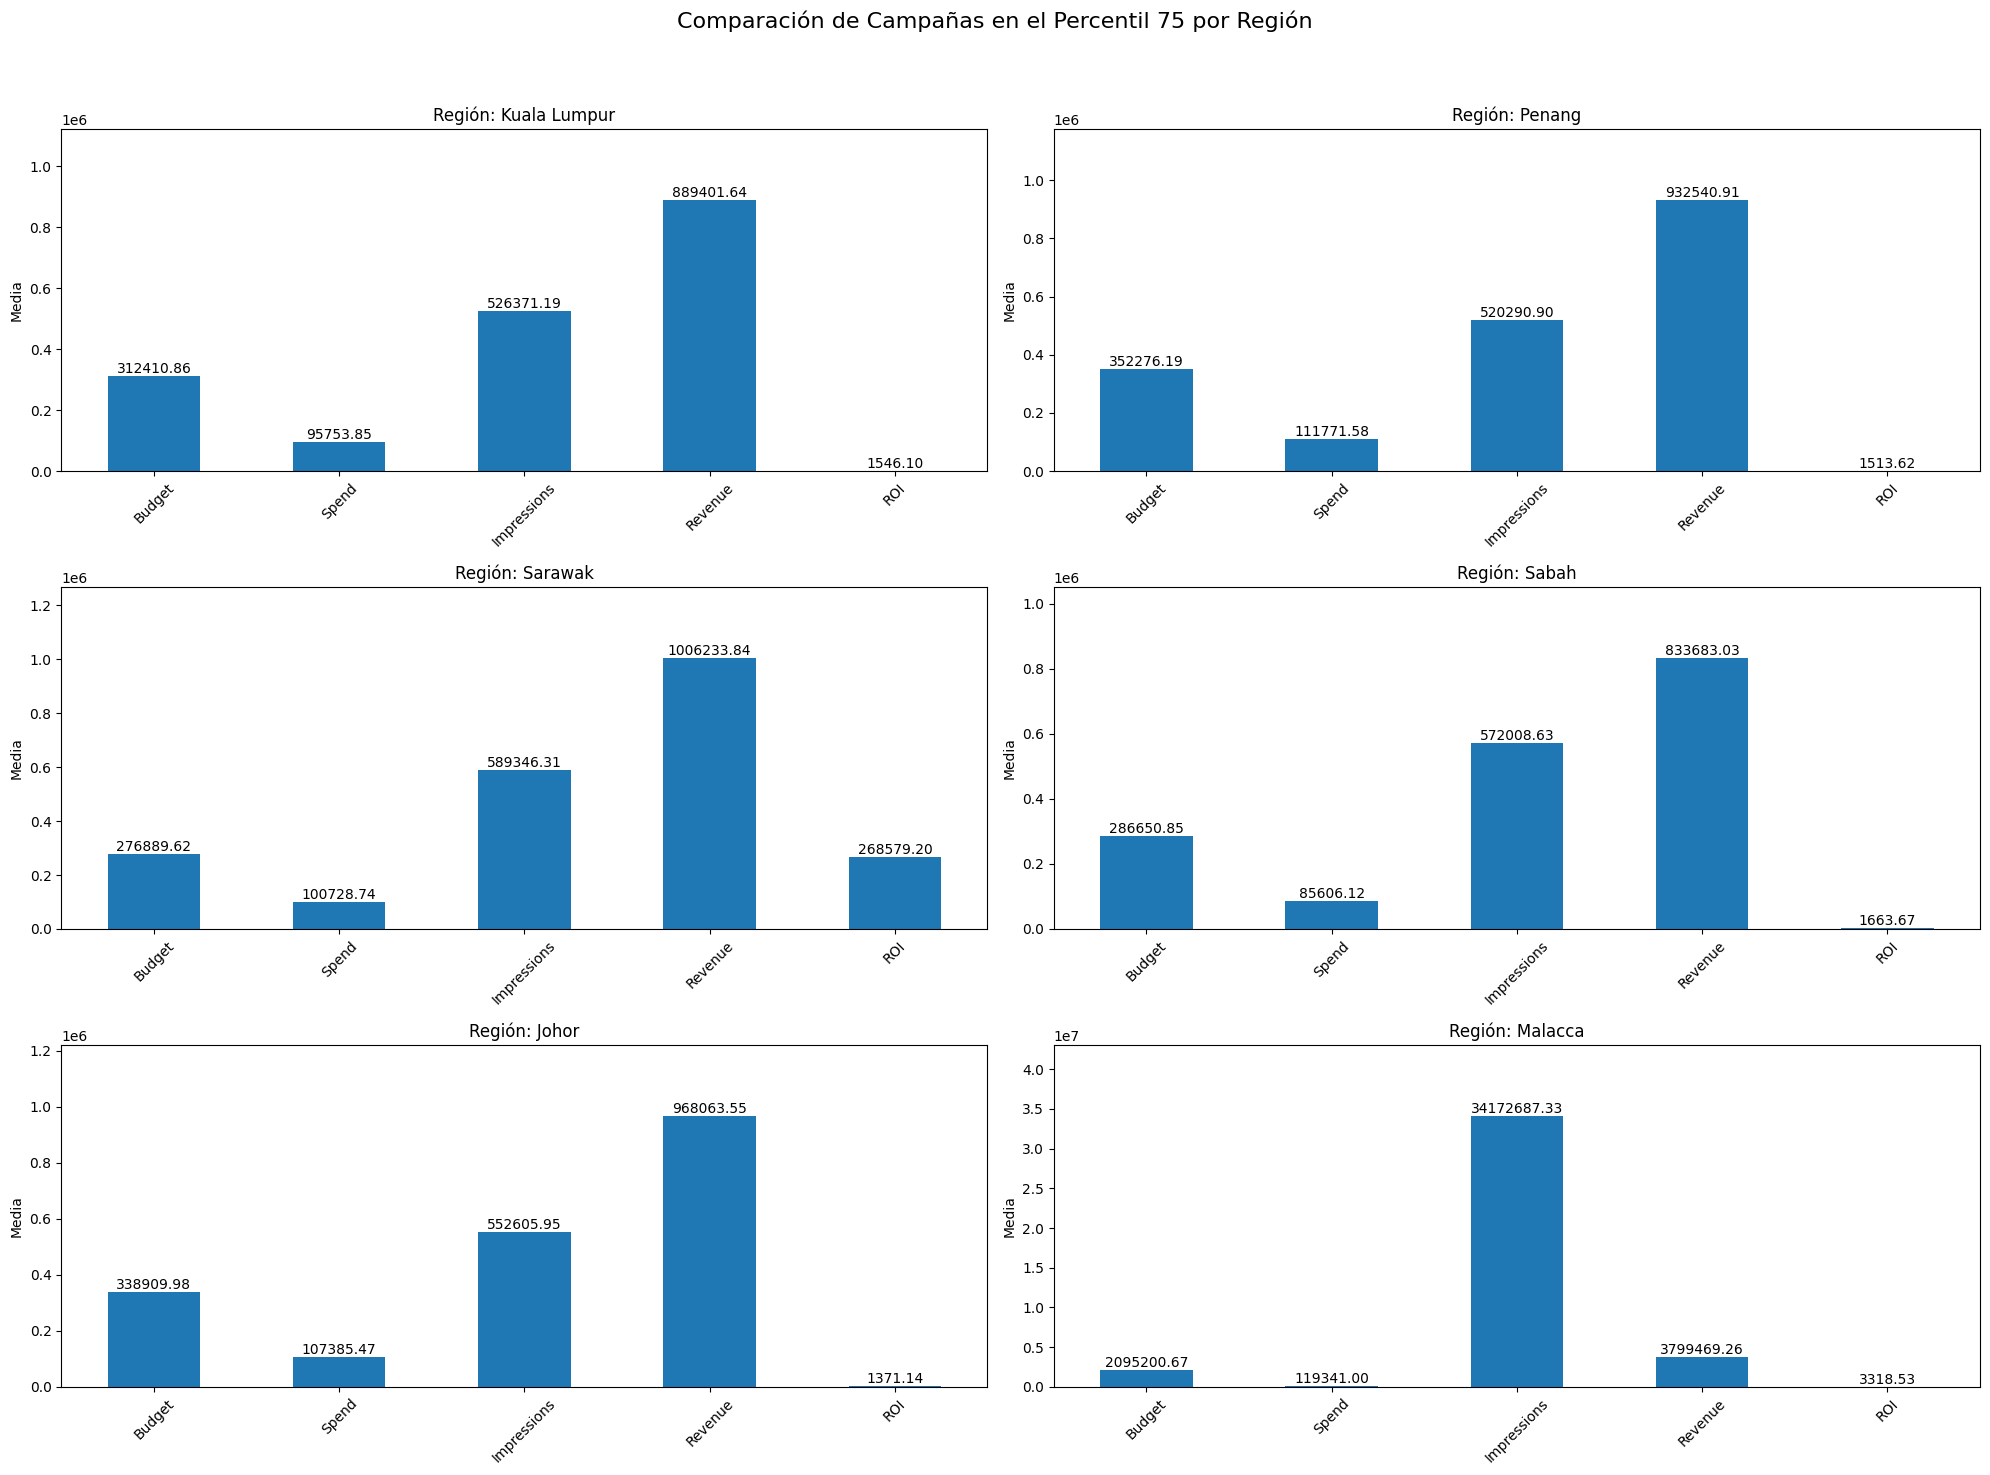


Tabla descriptiva de la Región: Kuala Lumpur (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,1.050000e+02,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000,1.050000e+02,105.000000,105.000000,105.000000,105.000000
mean,3.202601e+05,46516.885181,4.636705e+05,27074.452456,23.588163,5101.069198,24.384982,1.102620e+06,2935.799080,118.257143,3.085714,5.780952
std,3.801895e+05,53674.589877,3.739448e+05,16689.345834,58.013812,3067.045262,23.569868,1.575518e+06,2479.255491,91.576789,1.428516,2.967714
min,2.648000e+04,6076.000000,2.070000e+03,259.000000,0.037673,181.000000,1.224719,1.066130e+05,961.685224,0.000000,1.000000,1.000000
25%,1.651360e+05,20404.000000,1.774350e+05,18674.000000,3.586113,2143.000000,6.881950,5.414210e+05,1348.759665,44.000000,2.000000,3.000000
50%,2.672980e+05,33282.000000,4.316880e+05,26684.000000,8.263906,5178.000000,16.346132,7.340000e+05,1975.586585,79.000000,3.000000,6.000000
75%,4.076140e+05,50756.000000,6.698360e+05,35695.000000,25.344243,7558.000000,31.672138,9.225900e+05,3674.387376,187.000000,4.000000,9.000000
max,3.524241e+06,378657.000000,2.523000e+06,132624.507900,563.632594,12284.646200,92.626480,8.380897e+06,15436.372614,344.000000,5.000000,10.000000



Tabla descriptiva de la Región: Penang (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,1.020000e+02,1.020000e+02,1.020000e+02,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000
mean,2.679647e+05,7.827523e+04,5.532127e+05,27677.510679,13.667806,6028.062451,28.520527,1.245346e+06,2815.154283,130.029412,3.284314,5.421569
std,2.791402e+05,2.033333e+05,5.133668e+05,23147.794303,20.003357,6949.299582,24.692810,2.367363e+06,2848.995802,97.274996,1.423825,2.895665
min,1.558100e+04,5.280000e+03,3.669000e+03,104.000000,0.022448,250.000000,1.281788,1.019290e+05,844.632810,1.000000,1.000000,1.000000
25%,1.172290e+05,1.826600e+04,3.146775e+05,11087.500000,2.831024,2521.707700,8.405563,5.745755e+05,1081.930797,54.250000,2.000000,3.000000
50%,2.653320e+05,4.378450e+04,5.046710e+05,27789.500000,5.180301,4951.500000,22.431685,7.887290e+05,1598.742223,109.000000,4.000000,5.000000
75%,3.558770e+05,6.783625e+04,6.543060e+05,38826.750000,13.120946,8073.000000,40.938167,9.100012e+05,2856.884465,207.250000,4.750000,8.000000
max,2.729750e+06,1.981140e+06,4.062700e+06,188618.923900,95.260000,60618.273070,98.228017,2.130306e+07,14776.487432,360.000000,5.000000,10.000000



Tabla descriptiva de la Región: Sarawak (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,1.120000e+02,1.120000e+02,112.000000,112.000000,112.000000
mean,3.110490e+05,67264.130613,5.570449e+05,29287.402657,23.336132,6525.336894,33.705320,1.360278e+06,6.059472e+05,137.767857,3.089286,5.294643
std,4.175746e+05,82981.684018,7.041106e+05,28038.573122,49.189644,7454.295641,27.680901,1.862033e+06,6.385524e+06,91.826902,1.417736,2.696806
min,1.001500e+04,1.000000,1.096194e+04,491.000000,0.054420,43.000000,0.115013,1.077900e+05,9.238505e+02,1.000000,1.000000,1.000000
25%,1.525388e+05,24050.250000,2.003750e+05,12771.500000,2.875116,2889.500000,10.518913,5.926875e+05,1.227292e+03,54.250000,2.000000,3.000000
50%,2.742810e+05,42241.000000,5.070560e+05,26524.000000,5.542891,5213.000000,26.232949,7.579335e+05,1.710486e+03,117.000000,3.000000,5.000000
75%,3.571485e+05,72987.750000,7.536052e+05,38641.750000,25.829331,8225.500000,56.527091,9.202738e+05,2.942263e+03,206.000000,4.000000,7.250000
max,3.283213e+06,405099.000000,7.241226e+06,221562.796800,457.089952,67712.567350,99.310000,8.755533e+06,6.758060e+07,363.000000,5.000000,10.000000



Tabla descriptiva de la Región: Sabah (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000
mean,264383.683036,47514.784213,6.728920e+05,35364.044151,15.791440,7040.159468,27.568383,1.017310e+06,2884.120368,130.651786,2.982143,5.607143
std,133416.946002,44486.561396,1.032884e+06,40747.501526,21.247175,7799.113306,24.024434,1.389027e+06,3417.399466,86.202225,1.439358,2.848604
min,13658.000000,5434.000000,5.057000e+03,170.000000,0.049418,86.000000,0.249931,9.787900e+04,915.750037,0.000000,1.000000,1.000000
25%,151879.500000,19732.250000,2.426198e+05,20169.000000,3.941926,3004.000000,11.709206,4.800715e+05,1143.968240,61.000000,2.000000,3.000000
50%,265332.000000,35620.000000,5.141000e+05,30534.000000,7.022995,5519.000000,20.092661,7.148580e+05,1785.644942,126.500000,3.000000,6.000000
75%,378454.500000,60160.250000,7.508000e+05,40425.500000,18.628998,7740.250000,35.572916,9.017880e+05,3037.762337,188.500000,4.000000,8.000000
max,497607.000000,259985.000000,8.117866e+06,299685.400000,96.180000,49214.490910,99.795146,8.633691e+06,28287.323891,334.000000,5.000000,10.000000



Tabla descriptiva de la Región: Johor (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,9.600000e+01,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,3.476919e+05,67997.322917,6.706426e+05,33194.109218,18.386365,6434.537146,33.870385,1.374680e+06,2596.069584,140.208333,2.885417,5.750000
std,4.728292e+05,79954.844882,1.160856e+06,31472.764618,25.605903,5760.436346,41.315344,1.873170e+06,2197.357541,94.533193,1.520871,3.029678
min,3.898400e+04,5672.000000,8.765603e+03,260.000000,0.037467,138.000000,0.428080,1.446020e+05,862.473134,1.000000,1.000000,1.000000
25%,1.473685e+05,23783.250000,1.890110e+05,15792.500000,3.086640,3769.750000,12.956188,5.398898e+05,1098.833755,59.750000,1.000000,3.000000
50%,2.747980e+05,40554.000000,4.225550e+05,29593.500000,8.140834,5799.000000,20.874794,8.242920e+05,1852.931206,128.000000,3.000000,6.000000
75%,3.638108e+05,79267.250000,7.379318e+05,42236.500000,20.687500,7824.000000,39.114455,9.669642e+05,2984.409361,225.500000,4.000000,8.000000
max,3.537135e+06,428864.000000,7.741763e+06,227605.634100,96.962880,40417.628400,344.842756,9.067022e+06,11721.393189,356.000000,5.000000,10.000000



Tabla descriptiva de la Región: Malacca (Outliers Superiores)


,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,3.000000e+00,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.0
mean,2.095201e+06,119341.000000,3.417269e+07,27398.000000,5.369571,5173.000000,18.939514,3.799469e+06,3318.528978,120.666667,3.666667,5.0
std,1.592887e+06,25288.070765,5.694691e+07,7380.165107,8.567122,3910.592155,12.493124,6.224066e+05,1021.211719,46.068789,1.154701,4.0
min,2.653320e+05,91250.000000,1.811420e+05,19906.000000,0.034690,1247.000000,4.513700,3.136350e+06,2235.619075,71.000000,3.000000,1.0
25%,1.557151e+06,108866.500000,1.300731e+06,23766.500000,0.428572,3225.500000,15.328286,3.513695e+06,2845.716754,100.000000,3.000000,3.0
50%,2.848970e+06,126483.000000,2.420320e+06,27627.000000,0.822453,5204.000000,26.142871,3.891040e+06,3455.814434,129.000000,3.000000,5.0
75%,3.010135e+06,133386.500000,5.116846e+07,31144.000000,8.037012,7136.000000,26.152420,4.131029e+06,3859.983929,145.500000,4.000000,7.0
max,3.171300e+06,140290.000000,9.991660e+07,34661.000000,15.251571,9068.000000,26.161969,4.371018e+06,4264.153425,162.000000,5.000000,9.0


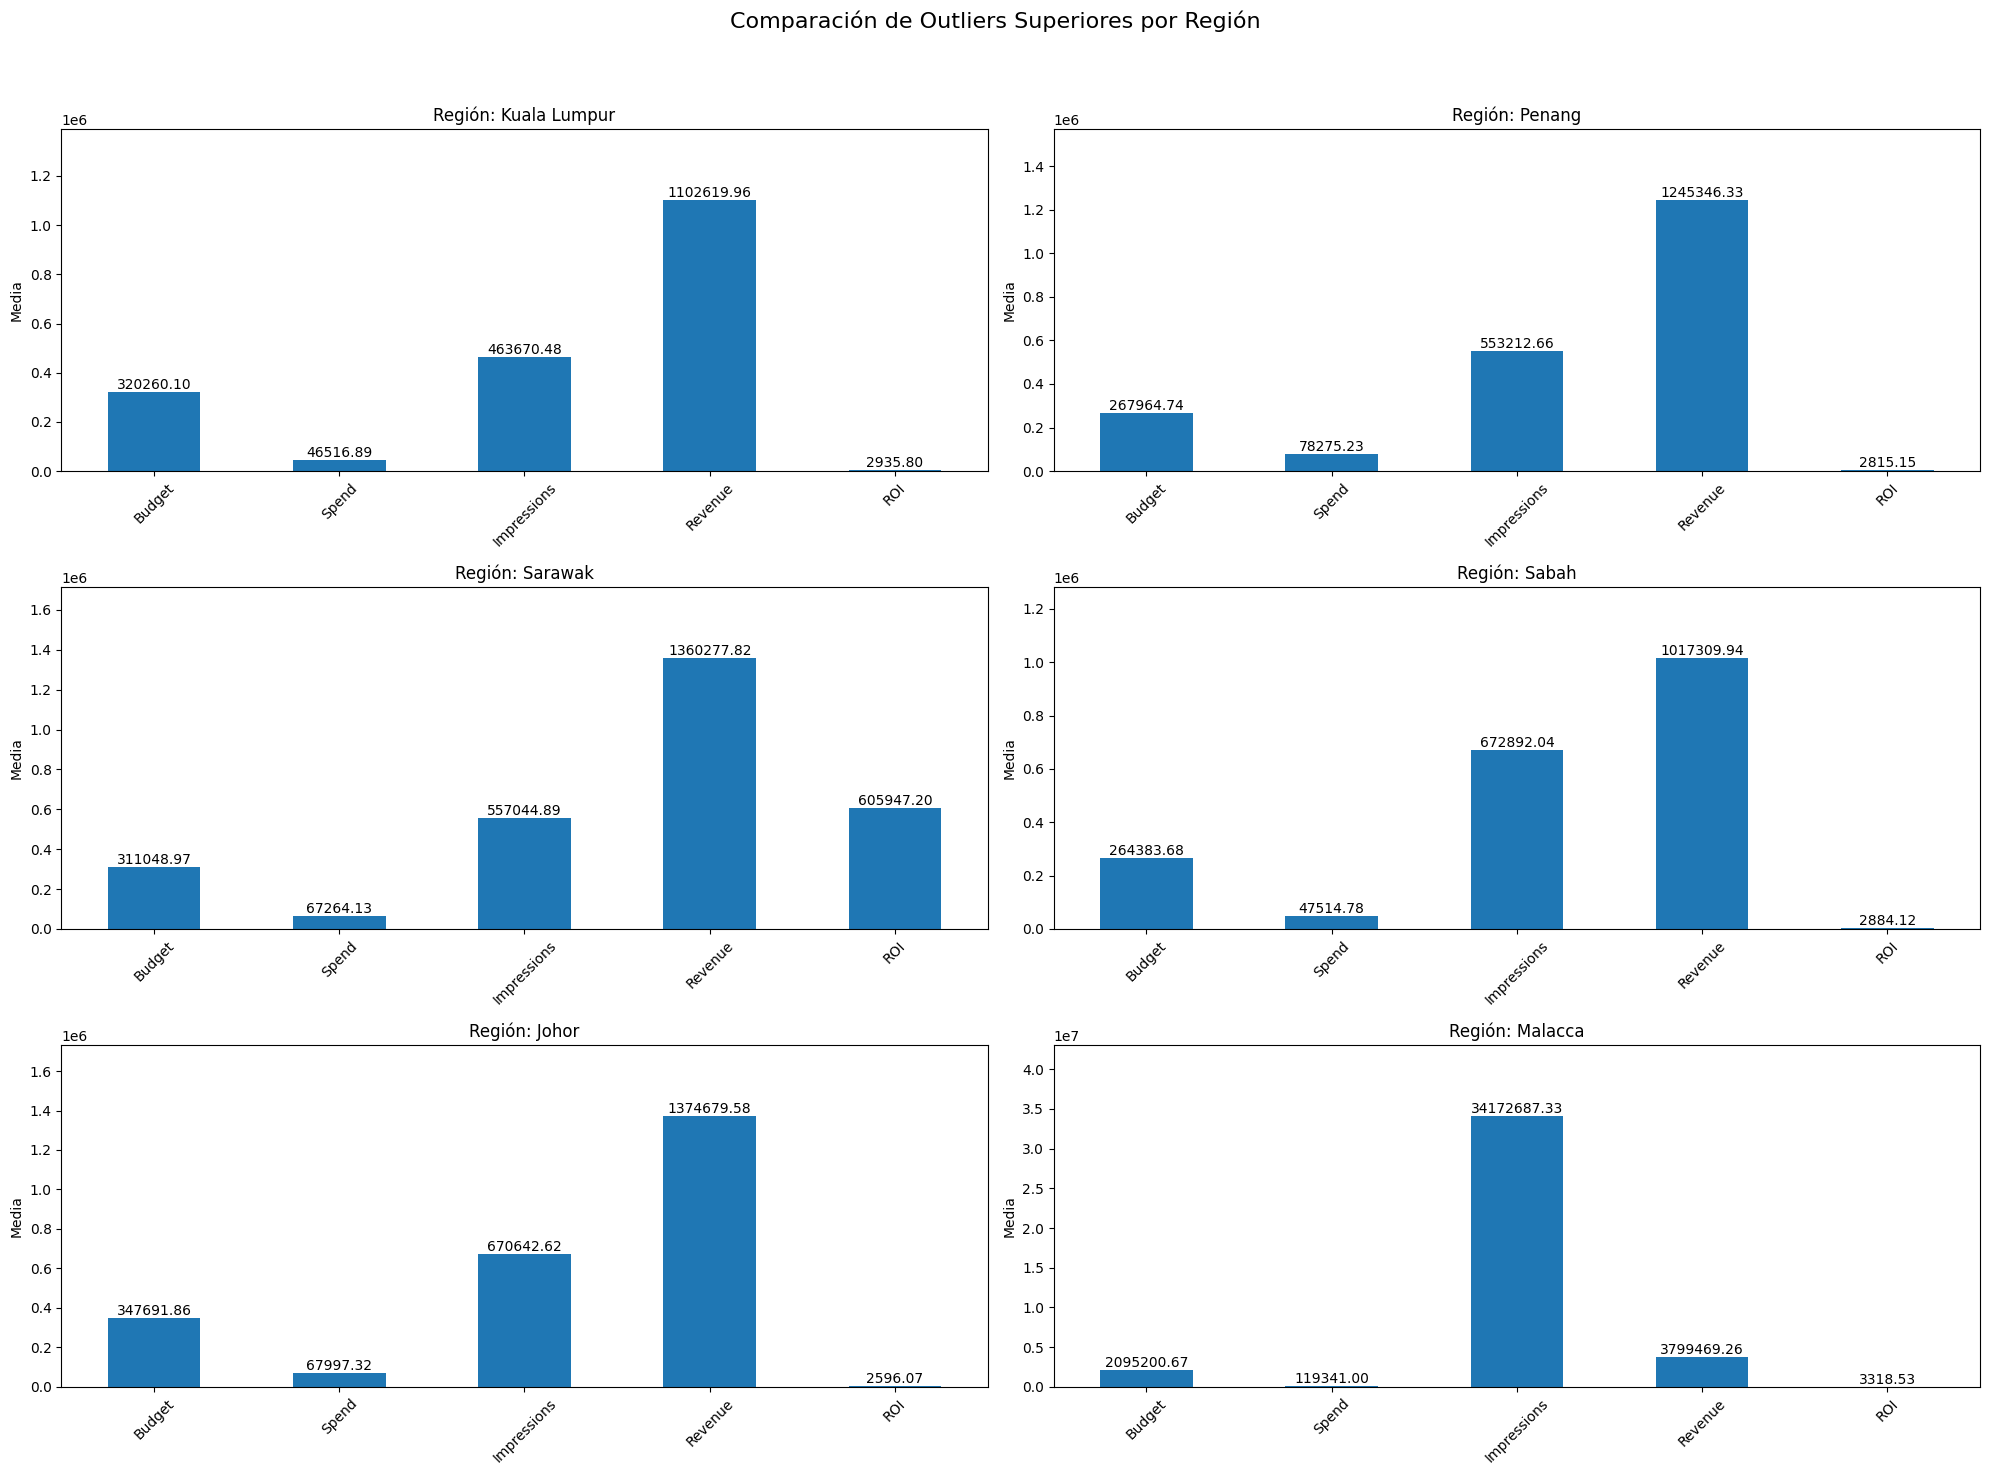

In [ ]:


# Definimos la función para encontrar campañas exitosas por región
# con opciones para percentiles y outliers

def campañas_por_percentil(df, col_region, col_roi, umbral=0.75):
    factores_por_region = {}
    for region in df[col_region].unique():
        region_df = df[df[col_region] == region]
        umbral_percentil = region_df[col_roi].quantile(umbral)
        percentil_datos = region_df[region_df[col_roi] > umbral_percentil]
        factores_por_region[region] = percentil_datos.describe()
    return factores_por_region

def campañas_outliers_superiores(df, col_region, col_roi):
    factores_por_region = {}
    for region in df[col_region].unique():
        region_df = df[df[col_region] == region]
        iqr = region_df[col_roi].quantile(0.75) - region_df[col_roi].quantile(0.25)
        limite_superior = region_df[col_roi].quantile(0.75) + 1.5 * iqr
        outliers_superiores = region_df[region_df[col_roi] > limite_superior]
        factores_por_region[region] = outliers_superiores.describe()
    return factores_por_region

# Aplicamos las funciones al DataFrame original 'df'
factores_percentil = campañas_por_percentil(df, 'Region', 'ROI')
factores_outliers = campañas_outliers_superiores(df, 'Region', 'ROI')

# Visualización de los datos en el percentil 75
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Comparación de Campañas en el Percentil 75 por Región', fontsize=16)

regiones = list(factores_percentil.keys())
metricas = ['Budget', 'Spend', 'Impressions', 'Revenue', 'ROI']

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    resumen = factores_percentil[region]
    barras = resumen.loc['mean', metricas].plot(kind='bar', ax=ax)
    ax.set_title(f'Región: {region}')
    ax.set_ylabel('Media')
    ax.set_xticklabels(metricas, rotation=45)
    
    # Añadir etiquetas de datos
    for p in barras.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    # Ajustar el límite superior del eje Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.2)
    
    # Mostrar tabla descriptiva
    print(f"\nTabla descriptiva de la Región: {region} (Percentil 75)")
    display(resumen)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualización de los outliers superiores
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Comparación de Outliers Superiores por Región', fontsize=16)

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    resumen = factores_outliers[region]
    barras = resumen.loc['mean', metricas].plot(kind='bar', ax=ax)
    ax.set_title(f'Región: {region}')
    ax.set_ylabel('Media')
    ax.set_xticklabels(metricas, rotation=45)
    
    # Añadir etiquetas de datos
    for p in barras.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    
    # Ajustar el límite superior del eje Y
    ax.set_ylim(top=ax.get_ylim()[1] * 1.2)
    
    # Mostrar tabla descriptiva
    print(f"\nTabla descriptiva de la Región: {region} (Outliers Superiores)")
    display(resumen)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### Diagnostico de las campañas efectivas ubicadas en el percentil de 75%

##### Kuala lumpur
- Promedio de ingresos (Revenue): 889,401 MYR con un máximo de 8,380,897 MYR.

##### Penang
- Promedio de ingresos (Revenue): 932,540 MYR, con un máximo de 21,303,060 MYR.

##### Sarawak
- Promedio de ingresos (Revenue): 1,006,234 MYR con máximos de 8,755,533 MYR.

##### Sabah
- Promedio de ingresos (Revenue): 833,683 MYR con un máximo de 8,633,691 MYR.

##### Johor
- Promedio de ingresos (Revenue): 968,064 MYR con un ROI promedio de 1,371.

##### Malacca
- Promedio de ingresos (Revenue): 3,799,469 MYR, aunque la muestra es muy pequeña.
- ROI alto (3,318) y un presupuesto considerable.
- Conclusión: Aunque los ingresos y el ROI son altos, se necesitan más datos para confirmar que invertir más sea una estrategia segura.

#### Conclusión 
Penang y Kuala Lumpur muestran un alto potencial de ingresos, pero requieren una estrategia optimizada para reducir la variabilidad. Johor destaca por su estabilidad, lo que sugiere que una mayor inversión controlada podría ser rentable.

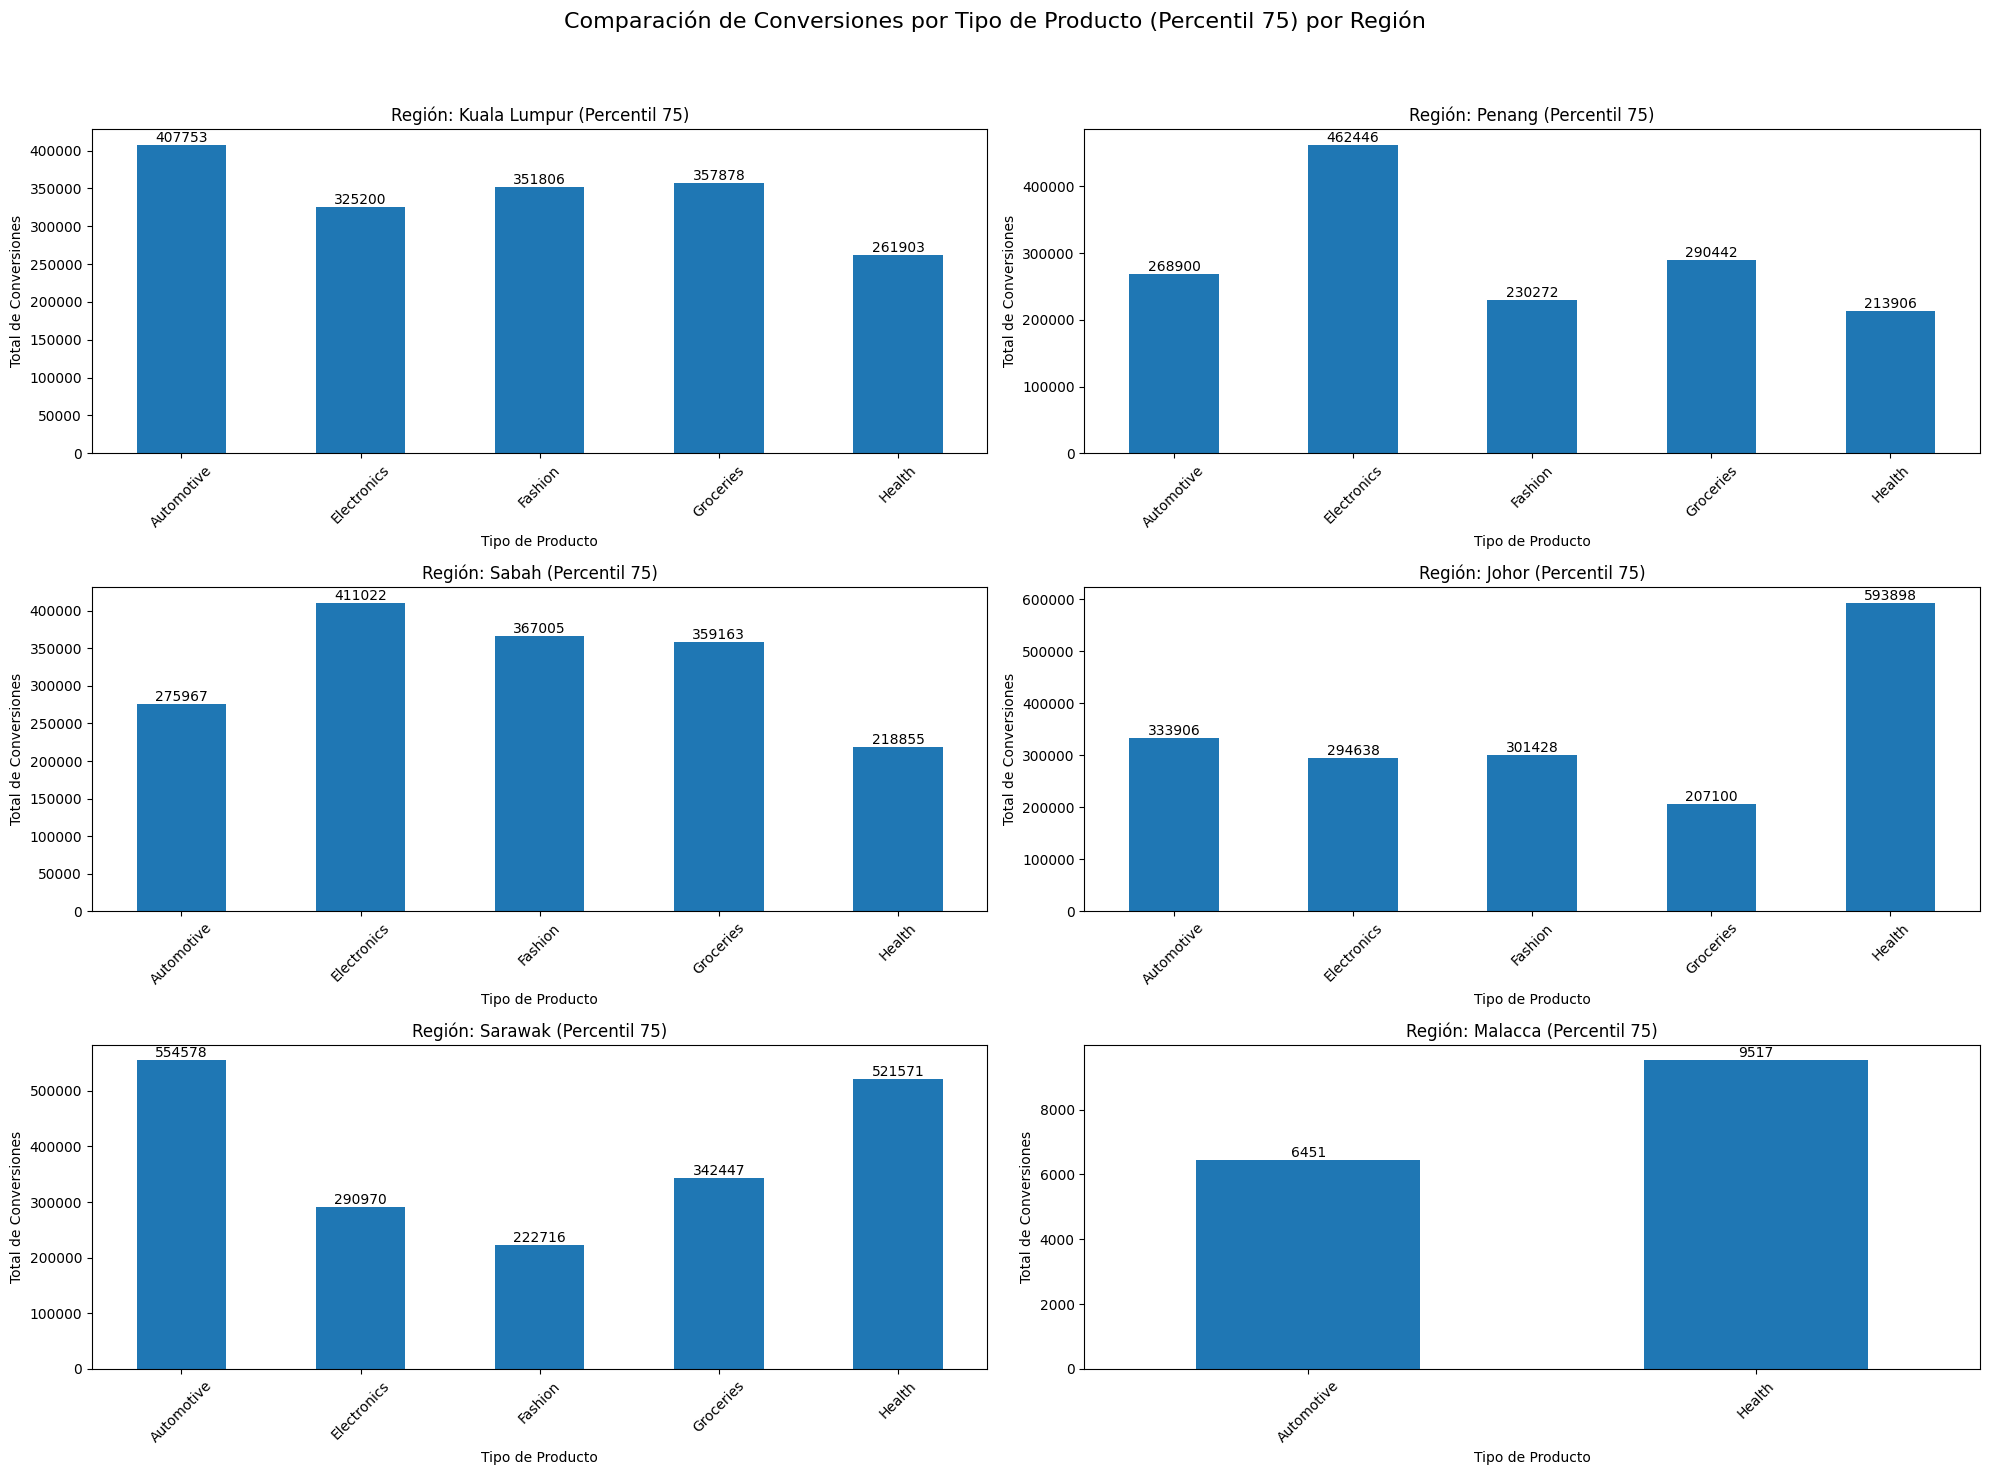

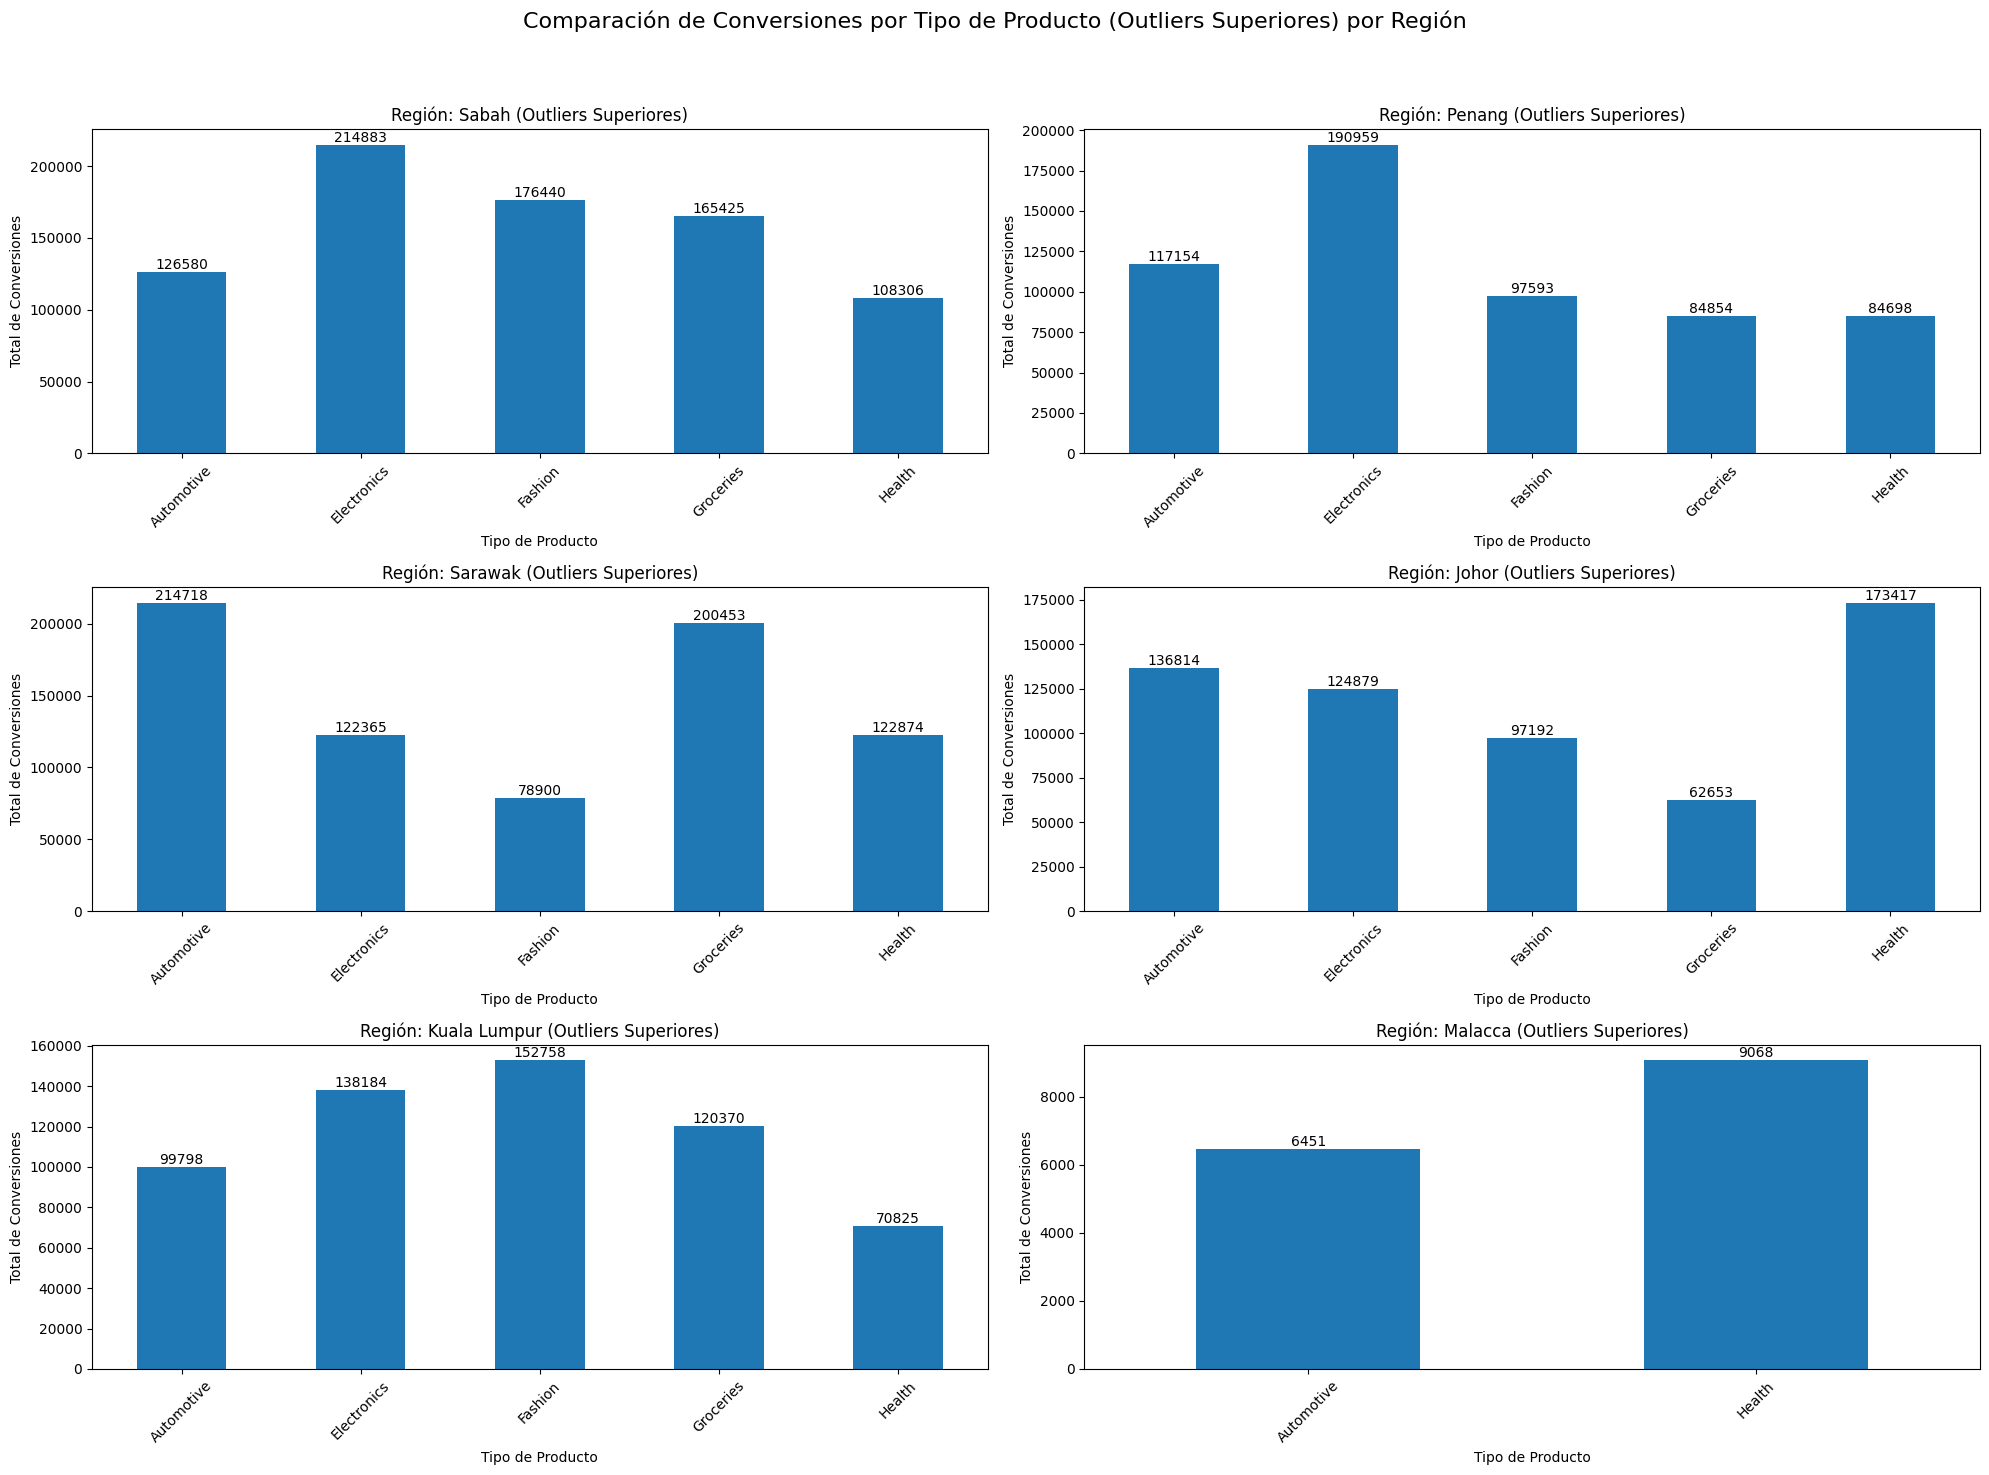

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener conversiones por producto por región

def conversiones_por_producto_por_region(df, col_region, col_producto, col_conversiones):
    conversiones_por_region = {}
    for region in df[col_region].unique():
        region_df = df[df[col_region] == region]
        conversiones_producto = region_df.groupby(col_producto)[col_conversiones].sum()
        conversiones_por_region[region] = conversiones_producto
    return conversiones_por_region

# Funciones para filtrar los datos en el percentil 75 y los outliers superiores
def filtrar_percentil(df, col_roi, umbral=0.75):
    return df[df[col_roi] > df[col_roi].quantile(umbral)]

def filtrar_outliers_superiores(df, col_roi):
    iqr = df[col_roi].quantile(0.75) - df[col_roi].quantile(0.25)
    limite_superior = df[col_roi].quantile(0.75) + 1.5 * iqr
    return df[df[col_roi] > limite_superior]

# Filtramos los datos
percentil_75_df = filtrar_percentil(df, 'ROI')
outliers_superiores_df = filtrar_outliers_superiores(df, 'ROI')

# Calculamos conversiones por producto por región para el percentil 75 y los outliers superiores
conversiones_percentil_75 = conversiones_por_producto_por_region(percentil_75_df, 'Region', 'Product_Category', 'Conversions')
conversiones_outliers_superiores = conversiones_por_producto_por_region(outliers_superiores_df, 'Region', 'Product_Category', 'Conversions')

# Visualización para el percentil 75
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Comparación de Conversiones por Tipo de Producto (Percentil 75) por Región', fontsize=16)

regiones = list(conversiones_percentil_75.keys())

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    conversiones_percentil_75[region].plot(kind='bar', ax=ax)
    ax.set_title(f'Región: {region} (Percentil 75)')
    ax.set_ylabel('Total de Conversiones')
    ax.set_xlabel('Tipo de Producto')
    ax.set_xticklabels(conversiones_percentil_75[region].index, rotation=45)
    
    # Añadir etiquetas de datos
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualización para los outliers superiores
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Comparación de Conversiones por Tipo de Producto (Outliers Superiores) por Región', fontsize=16)

regiones = list(conversiones_outliers_superiores.keys())

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    conversiones_outliers_superiores[region].plot(kind='bar', ax=ax)
    ax.set_title(f'Región: {region} (Outliers Superiores)')
    ax.set_ylabel('Total de Conversiones')
    ax.set_xlabel('Tipo de Producto')
    ax.set_xticklabels(conversiones_outliers_superiores[region].index, rotation=45)
    
    # Añadir etiquetas de datos
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### Análisis y Recomendación de Inversión:

- Kuala lumpur:

Percentil 75: Los productos de la categoría Automotive y Groceries tienen las mayores conversiones.

Outliers Superiores: Fashion y Groceries destacan con conversiones significativas.

Recomendación: Invertir en Groceries y Fashion podría maximizar el retorno, especialmente si se busca aprovechar los éxitos más destacados.

- Penang:

Percentil 75: La categoría de Electronics es la que más conversiones ha generado.

Outliers Superiores: También es Electronics la que se mantiene como líder.

Recomendación: Focalizar la inversión en Electronics podría continuar generando altas conversiones.

- Sarawak:

Percentil 75: Automotive y Health son líderes en conversiones.

Outliers Superiores: Automotive y Groceries son las categorías destacadas.

Recomendación: Invertir en Automotive es consistente tanto en campañas regulares como en las más exitosas.

- Sabah:

Percentil 75: Groceries y Fashion lideran en conversiones.

Outliers Superiores: Electronics y Fashion destacan.

Recomendación: La categoría Fashion muestra buenos resultados tanto en el percentil 75 como en outliers, por lo que sería una opción sólida para inversión.

- Johor: 

Percentil 75: Health es la categoría más destacada, seguida de Automotive.

Outliers Superiores: Health sigue siendo la categoría dominante.

Recomendación: Enfocar la inversión en Health podría maximizar los beneficios, ya que consistentemente muestra el mayor número de conversiones.

- Malacca:

Percentil 75 y Outliers Superiores: Health es la única categoría que sobresale.

Recomendación: Aumentar la inversión en Health es lo más adecuado en esta región, considerando el dominio de esta categoría en ambos análisis.


### Conclusión General:
- Invertir más en Health en Johor y Malacca.
- Apostar por Fashion y Electronics en Sabah y Penang.
- En Kuala Lumpur, diversificar en Groceries y Fashion sería una estrategia prometedora.

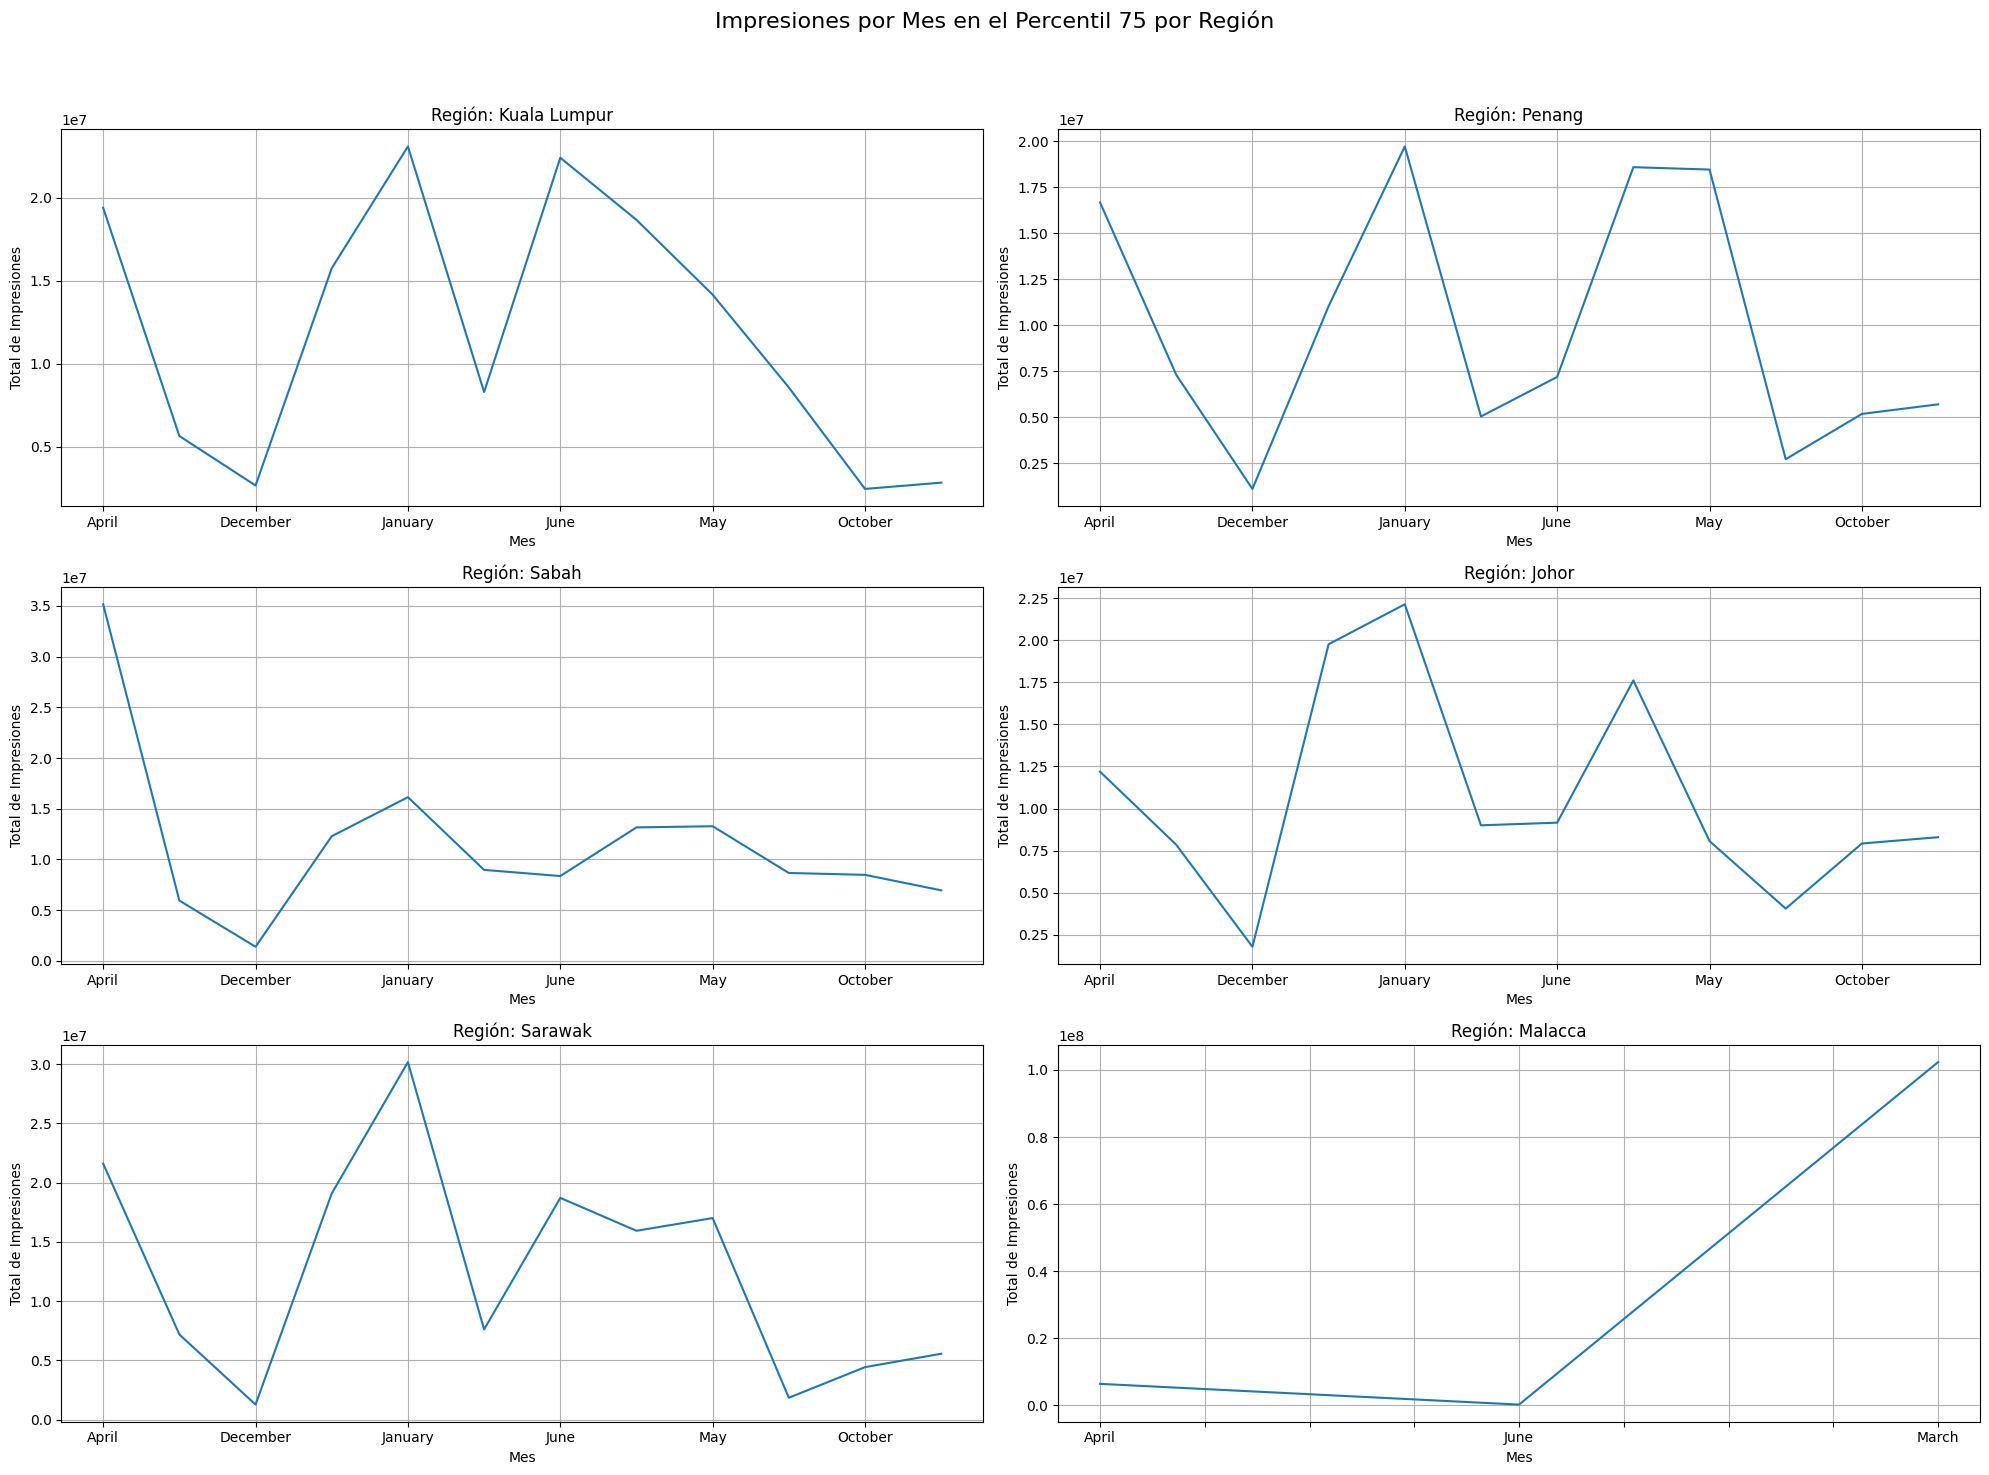

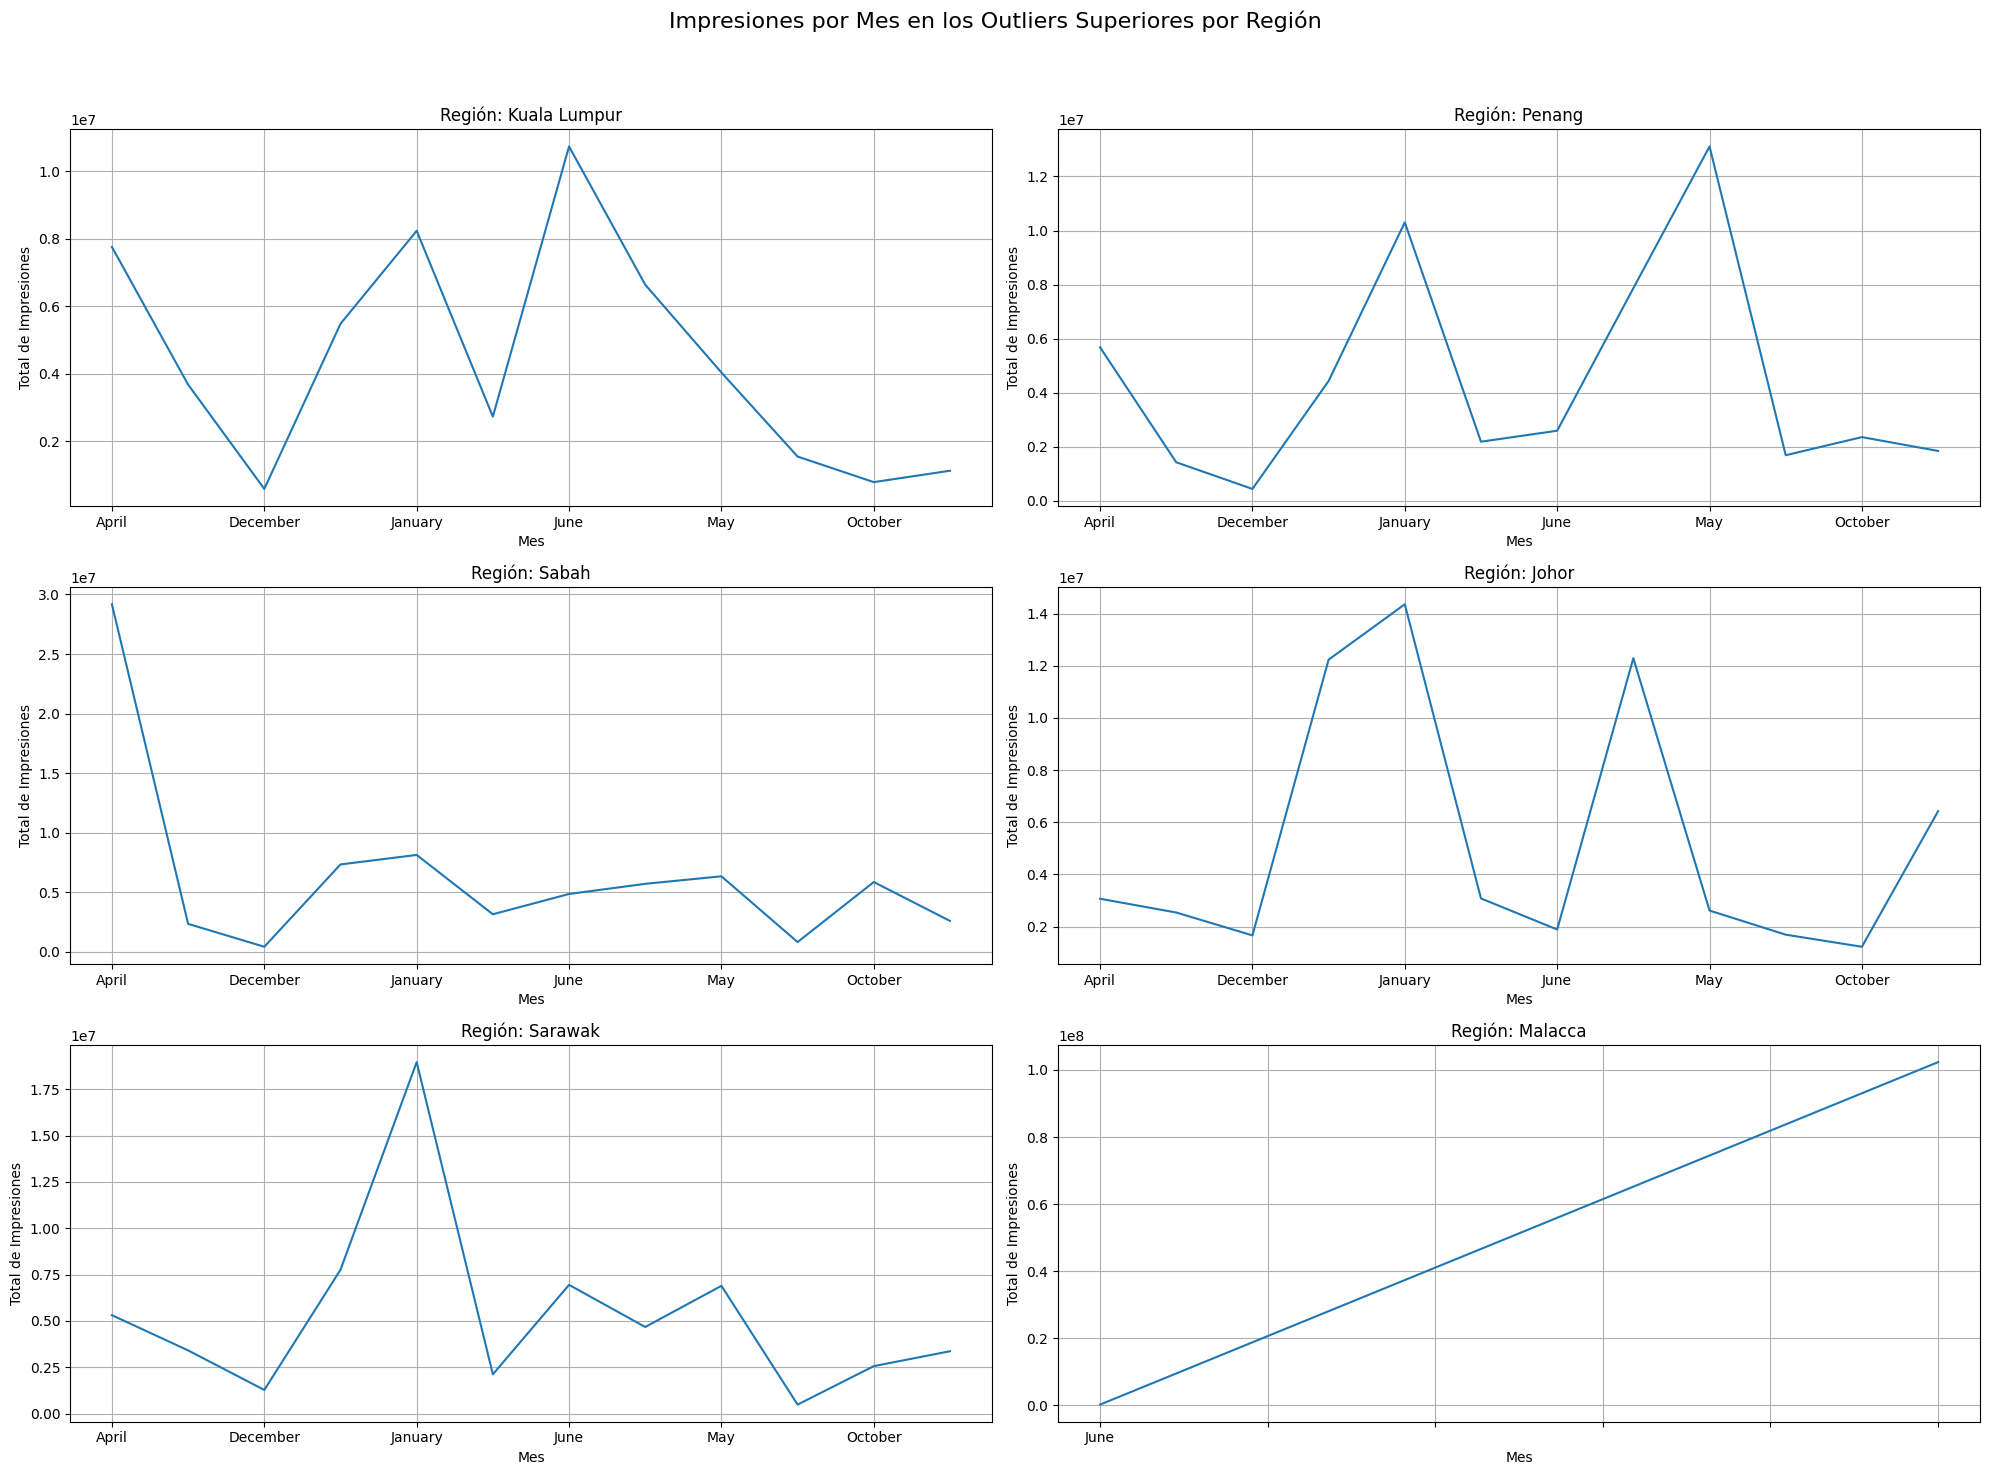

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

# Función para obtener conversiones por producto por región
def conversiones_por_producto_por_region(df, col_region, col_producto, col_conversiones):
    conversiones_por_region = {}
    for region in df[col_region].unique():
        region_df = df[df[col_region] == region]
        conversiones_producto = region_df.groupby(col_producto)[col_conversiones].sum()
        conversiones_por_region[region] = conversiones_producto
    return conversiones_por_region

# Funciones para filtrar los datos en el percentil 75 y los outliers superiores
def filtrar_percentil(df, col_roi, umbral=0.75):
    return df[df[col_roi] > df[col_roi].quantile(umbral)]

def filtrar_outliers_superiores(df, col_roi):
    iqr = df[col_roi].quantile(0.75) - df[col_roi].quantile(0.25)
    limite_superior = df[col_roi].quantile(0.75) + 1.5 * iqr
    return df[df[col_roi] > limite_superior]

# Función para agregar una columna de mes a partir de la fecha de inicio
def agregar_mes(df, col_fecha):
    df['Month'] = pd.to_datetime(df[col_fecha]).dt.strftime('%B')  # Convertimos el número del mes a nombre
    return df

# Función para agrupar impresiones por mes y región basadas en el CTR
def impresiones_por_mes_y_region(df, col_region, col_mes, col_impressions, col_ctr):
    impresiones_por_region = {}
    for region in df[col_region].unique():
        region_df = df[df[col_region] == region]
        impresiones_mes = region_df.groupby(col_mes)[[col_impressions, col_ctr]].sum()
        impresiones_por_region[region] = impresiones_mes
    return impresiones_por_region

# Agregamos la columna de mes al DataFrame original
df = agregar_mes(df, 'Start_Date')

# Filtramos los datos
percentil_75_df = filtrar_percentil(df, 'ROI')
outliers_superiores_df = filtrar_outliers_superiores(df, 'ROI')

# Calculamos impresiones por mes y región para el percentil 75 y los outliers superiores
impresiones_percentil_75 = impresiones_por_mes_y_region(percentil_75_df, 'Region', 'Month', 'Impressions', 'CTR')
impresiones_outliers_superiores = impresiones_por_mes_y_region(outliers_superiores_df, 'Region', 'Month', 'Impressions', 'CTR')

# Visualización para el percentil 75 con gráficos por región
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Impresiones por Mes en el Percentil 75 por Región', fontsize=16)
regiones = list(impresiones_percentil_75.keys())

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    data = impresiones_percentil_75[region]
    data['Impressions'].plot(kind='line', ax=ax)
    ax.set_title(f'Región: {region}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Total de Impresiones')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Visualización para los outliers superiores con gráficos por región
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
fig.suptitle('Impresiones por Mes en los Outliers Superiores por Región', fontsize=16)

for i, region in enumerate(regiones):
    ax = axes[i // 2, i % 2]
    data = impresiones_outliers_superiores[region]
    data['Impressions'].plot(kind='line', ax=ax)
    ax.set_title(f'Región: {region}')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Total de Impresiones')
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



#### Resumen de los meses más rentables por región:
- Kuala lumpur:
Percentil 75: Los meses con más impresiones son diciembre y enero, lo que sugiere un rendimiento alto en estos meses.
Outliers Superiores: Se destacan los meses de junio y enero.
Recomendación: Invertir más en diciembre y enero podría maximizar las impresiones.

- Penang:
Percentil 75: Los picos más altos de impresiones se observan en enero y mayo.
Outliers Superiores: Mayo es particularmente sobresaliente.
Recomendación: Focalizar campañas en enero y mayo sería óptimo para aprovechar los picos de impresiones.

- Sabah
Percentil 75: abril es el mes más destacado, con un fuerte pico de impresiones.
Outliers Superiores: También resalta abril.
Recomendación: Concentrar inversiones en abril.

- Johor:
Percentil 75: enero y junio son los meses con más impresiones.
Outliers Superiores: El patrón se repite en enero y junio.
Recomendación: Invertir en enero y junio para maximizar las impresiones.

- Sarawak: 
Percentil 75: enero y junio muestran picos significativos.
Outliers Superiores: enero sigue siendo un mes destacado.
Recomendación: Focalizar campañas en enero y junio.

- Malacca: 
Percentil 75 y Outliers Superiores: marzo es el mes más sobresaliente.
Recomendación: Aumentar la inversión en marzo.

#### Conclusiones:
- Enero es un mes consistente y fuerte en términos de impresiones para la mayoría de las regiones.
- Las campañas en junio y abril también muestran buenos resultados en varias regiones.
- Planificar campañas enfocadas en estos meses podría mejorar la rentabilidad y el rendimiento de las impresiones en futuras campañas de marketing.


# **CONCLUSIONES FINALES**

# Resumen de Conclusiones del Análisis de Campañas de Marketing

## 1. Temporada Alta de Impresiones
- **Enero** es un mes consistente y fuerte en términos de impresiones para la mayoría de las regiones.
- **Abril** y **junio** también son meses que muestran buenos resultados en varias regiones.
- Planificar campañas enfocadas en estos meses podría mejorar la rentabilidad y el rendimiento de las impresiones en futuras campañas de marketing.

## 2. Recomendaciones por Región
- **Johor y Malacca**: Se debe priorizar la inversión en campañas relacionadas con la categoría *Health*, que ha mostrado un rendimiento destacado.
- **Sabah y Penang**: Se recomienda apostar por *Fashion* y *Electronics* como categorías de productos con alto potencial.
- **Kuala Lumpur**: Diversificar en las categorías *Groceries* y *Fashion* podría ser una estrategia prometedora para maximizar conversiones.

## 3. Potencial de Ingresos
- **Penang y Kuala Lumpur** muestran un alto potencial de ingresos, pero es necesario optimizar las estrategias para reducir la variabilidad y mejorar la consistencia en los resultados.
- **Johor** se destaca por su estabilidad, lo que sugiere que una mayor inversión controlada podría ser rentable y proporcionar retornos sólidos.

## 4. Optimización de Estrategias
- **Optimización del Gasto (Spend)**: Dado que un mayor *Spend* se asocia con un ROI más bajo, es crucial revisar la asignación de presupuesto para encontrar un equilibrio que maximice los ingresos sin sacrificar el retorno de inversión.
- **Aumentar la Eficiencia de Revenue**: Con la correlación positiva entre *Revenue* y *ROI*, las estrategias deben centrarse en incrementar los ingresos generados por cada campaña, mejorando las tácticas de conversión.
- **Evaluar Estrategias de CTR y Conversiones**: Aunque tienen correlaciones bajas con el *ROI*, el CTR y las conversiones pueden influir en el *Revenue*. Es necesario desarrollar estrategias para mejorar estas métricas sin incrementar el gasto de manera desproporcionada.
- **Monitoreo de la Relación Gasto-Ingreso**: Implementar modelos predictivos que permitan determinar el punto de retorno marginal óptimo puede ayudar a evitar un gasto excesivo que no genere retornos adicionales significativos.

Estas conclusiones proporcionan un marco estratégico para planificar campañas futuras, optimizar inversiones y mejorar la eficiencia de las campañas de marketing en Malasia.

